# 1. Cài đặt và Import thư viện

In [1]:
# Cài đặt các thư viện cần thiết
!pip install -q numpy pandas matplotlib seaborn scikit-learn lightgbm xgboost catboost

In [2]:
import importlib.util

# Danh sách các thư viện cần kiểm tra phiên bản
libraries = [
    "numpy", "pandas", "matplotlib", "seaborn", "gc", "time", "warnings", 
    "datetime", "sklearn", "lightgbm", "xgboost", "catboost"
]

# Kiểm tra và hiển thị phiên bản của từng thư viện
for lib in libraries:
    spec = importlib.util.find_spec(lib)
    if spec is not None:
        module = importlib.import_module(lib)
        version = getattr(module, '__version__', 'Không có thông tin phiên bản')
        print(f"{lib}: {version}")
    else:
        print(f"{lib}: Không được cài đặt")


numpy: 1.26.4
pandas: 2.2.3
matplotlib: 3.7.5
seaborn: 0.12.2
gc: Không có thông tin phiên bản
time: Không có thông tin phiên bản
warnings: Không có thông tin phiên bản
datetime: Không có thông tin phiên bản
sklearn: 1.2.2
lightgbm: 4.6.0
xgboost: 2.0.3
catboost: 1.2.7


In [3]:
# Import các thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import time
import warnings
from datetime import datetime
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

In [4]:
# Cấu hình hiển thị
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings('ignore')


In [5]:
# Thiết lập style cho biểu đồ
plt.style.use('ggplot')
sns.set_style('whitegrid')

# 2. Tải và Khám phá Dữ liệu

In [6]:
# Đọc dữ liệu giao dịch
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')

In [7]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [8]:
# Đọc dữ liệu định danh
train_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
test_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')

In [9]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [10]:
test_identity.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [11]:
# Chuẩn hóa tên cột trong test_identity: thay dấu gạch ngang (-) thành dấu gạch dưới (_)
test_identity.columns = [col.replace('-', '_') for col in test_identity.columns]

In [12]:
# Kiểm tra kích thước dữ liệu
print(f'Train Transaction: {train_transaction.shape}')
print(f'Test Transaction: {test_transaction.shape}')
print(f'Train Identity: {train_identity.shape}')
print(f'Test Identity: {test_identity.shape}')

Train Transaction: (590540, 394)
Test Transaction: (506691, 393)
Train Identity: (144233, 41)
Test Identity: (141907, 41)


In [13]:
# Kết hợp dữ liệu giao dịch và định danh
train = train_transaction.merge(train_identity, on='TransactionID', how='left')
test = test_transaction.merge(test_identity, on='TransactionID', how='left')

In [14]:
# Kiểm tra kích thước sau khi kết hợp
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (590540, 434)
Test shape: (506691, 433)


In [15]:
# Xem thông tin cơ bản của dữ liệu
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [16]:
# Xóa các DataFrame gốc để giải phóng RAM
del train_transaction, train_identity, test_transaction, test_identity
gc.collect()

0

# 3. Phân tích Khám phá Dữ liệu (EDA)

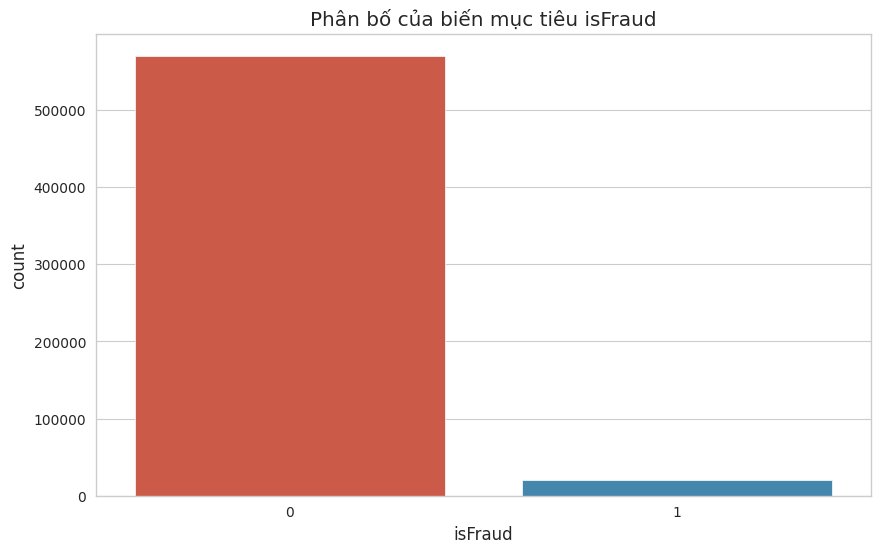

In [17]:
# Kiểm tra phân bố của biến mục tiêu
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', data=train)
plt.title('Phân bố của biến mục tiêu isFraud')
plt.show()

In [18]:
# Tính tỷ lệ gian lận
fraud_ratio = train['isFraud'].mean() * 100
print(f'Tỷ lệ giao dịch gian lận: {fraud_ratio:.2f}%')
print(f'Số lượng giao dịch gian lận: {train["isFraud"].sum()}')
print(f'Tổng số giao dịch: {len(train)}')

Tỷ lệ giao dịch gian lận: 3.50%
Số lượng giao dịch gian lận: 20663
Tổng số giao dịch: 590540


In [19]:
# Kiểm tra giá trị thiếu
missing_train = (train.isnull().sum() / len(train)) * 100
missing_test = (test.isnull().sum() / len(test)) * 100

In [20]:
missing_df = pd.DataFrame({'Train': missing_train, 'Test': missing_test})
missing_df = missing_df[missing_df.sum(axis=1) > 0].sort_values('Train', ascending=False)

In [21]:
# Hiển thị các cột có giá trị thiếu > 50%
print("Các cột có giá trị thiếu > 50%:")
print(missing_df[missing_df['Train'] > 50].head(20))

Các cột có giá trị thiếu > 50%:
           Train       Test
id_24  99.196159  99.064519
id_25  99.130965  99.005508
id_07  99.127070  99.001561
id_08  99.127070  99.001561
id_21  99.126393  99.001561
id_26  99.125715  99.003929
id_27  99.124699  99.000969
id_23  99.124699  99.000969
id_22  99.124699  99.000969
dist2  93.628374  92.809030
D7     93.409930  88.132215
id_18  92.360721  89.959364
D13    89.509263  75.649064
D14    89.469469  77.265434
D12    89.041047  86.332104
id_04  88.768923  86.879380
id_03  88.768923  86.879380
D6     87.606767  75.372959
id_33  87.589494  86.052446
id_09  87.312290  85.328731


## Phân tích TransactionDT

In [22]:
# Chuyển đổi TransactionDT thành ngày
START_DATE = '2017-12-01' # Bộ dữ liệu được cho là bắt đầu vào ngày này
start_date = datetime.strptime(START_DATE, '%Y-%m-%d')

In [23]:
def convert_to_datetime(x):
    return start_date + pd.Timedelta(seconds=x)

In [24]:
train['TransactionDate'] = train['TransactionDT'].apply(convert_to_datetime)
test['TransactionDate'] = test['TransactionDT'].apply(convert_to_datetime)

In [25]:
# Thêm các đặc trưng thời gian
for df in [train, test]:
    df['Day'] = df['TransactionDate'].dt.day
    df['Month'] = df['TransactionDate'].dt.month
    df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
    df['Hour'] = df['TransactionDate'].dt.hour

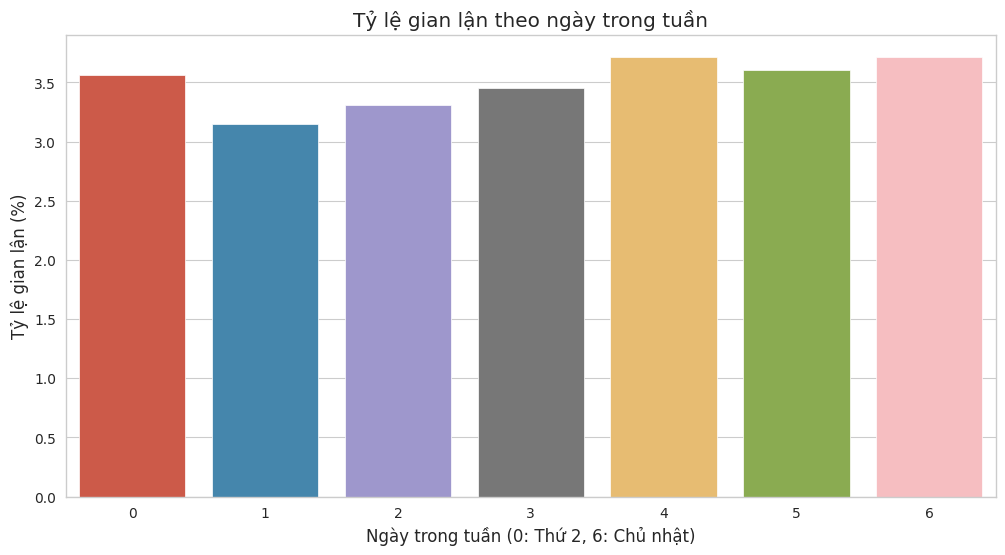

In [26]:
# Phân tích giao dịch gian lận theo ngày trong tuần
plt.figure(figsize=(12, 6))
fraud_by_day = train.groupby('DayOfWeek')['isFraud'].mean() * 100
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values)
plt.title('Tỷ lệ gian lận theo ngày trong tuần')
plt.xlabel('Ngày trong tuần (0: Thứ 2, 6: Chủ nhật)')
plt.ylabel('Tỷ lệ gian lận (%)')
plt.show()

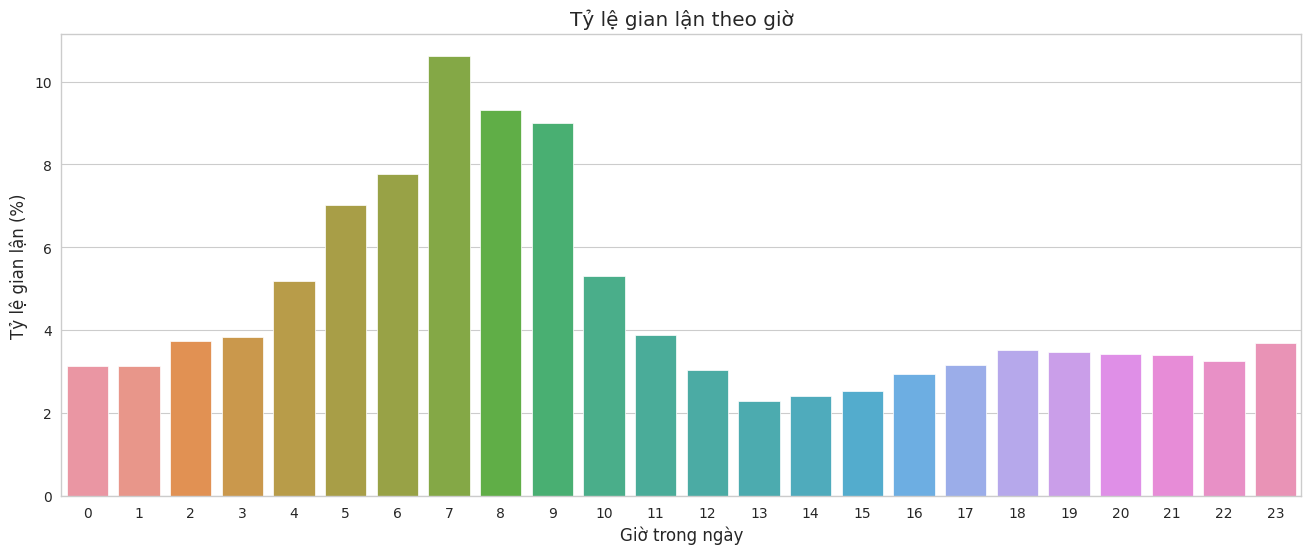

In [27]:
# Phân tích giao dịch gian lận theo giờ
plt.figure(figsize=(16, 6))
fraud_by_hour = train.groupby('Hour')['isFraud'].mean() * 100
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values)
plt.title('Tỷ lệ gian lận theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Tỷ lệ gian lận (%)')
plt.show()

## Phân tích TransactionAmt

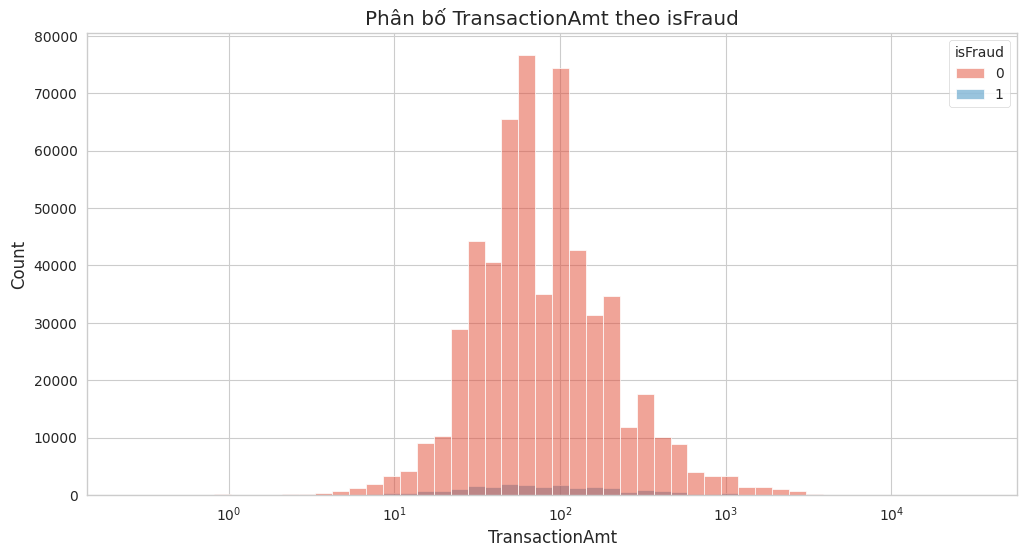

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='TransactionAmt', hue='isFraud', bins=50, log_scale=True)
plt.title('Phân bố TransactionAmt theo isFraud')
plt.show()

In [29]:
# Thêm đặc trưng phần thập phân của TransactionAmt
train['TransactionAmt_decimal'] = train['TransactionAmt'] - np.floor(train['TransactionAmt'])
test['TransactionAmt_decimal'] = test['TransactionAmt'] - np.floor(test['TransactionAmt'])

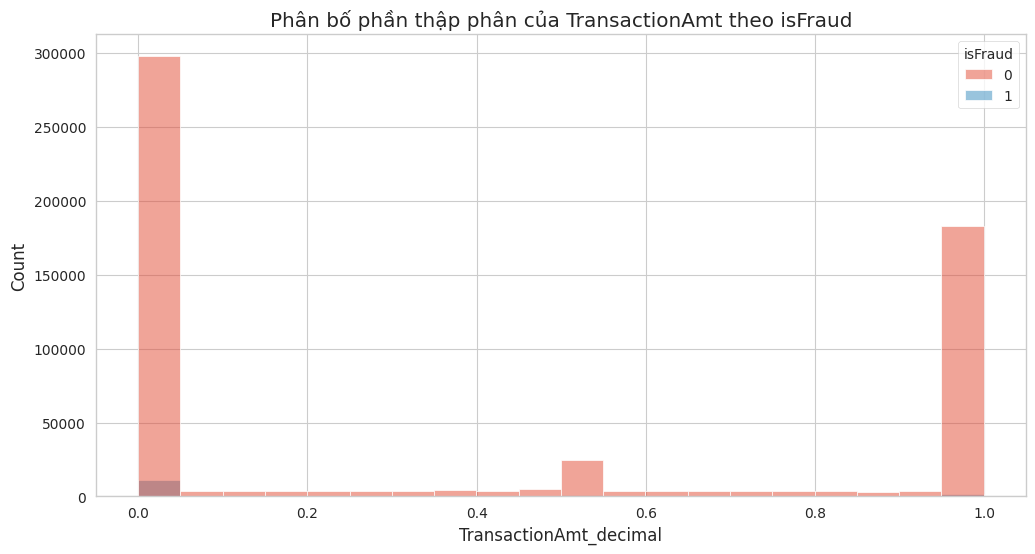

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='TransactionAmt_decimal', hue='isFraud', bins=20)
plt.title('Phân bố phần thập phân của TransactionAmt theo isFraud')
plt.show()

# 4. Tạo định danh khách hàng duy nhất (UID)

In [31]:
# Tạo UID dựa trên card1 và addr1
for df in [train, test]:
    df['uid1'] = df['card1'].astype(str) + '_' + df['addr1'].astype(str)
    
    # Tạo thêm các UID khác dựa trên các kết hợp khác nhau
    df['uid2'] = df['card1'].astype(str) + '_' + df['addr1'].astype(str) + '_' + df['card2'].astype(str)
    df['uid3'] = df['card1'].astype(str) + '_' + df['addr1'].astype(str) + '_' + df['card2'].astype(str) + '_' + df['card3'].astype(str)
    df['uid4'] = df['card1'].astype(str) + '_' + df['addr1'].astype(str) + '_' + df['card2'].astype(str) + '_' + df['card3'].astype(str) + '_' + df['card5'].astype(str)


In [32]:
# Kiểm tra số lượng UID duy nhất
print(f"Số lượng uid1 duy nhất trong tập train: {train['uid1'].nunique()}")
print(f"Số lượng uid2 duy nhất trong tập train: {train['uid2'].nunique()}")
print(f"Số lượng uid3 duy nhất trong tập train: {train['uid3'].nunique()}")
print(f"Số lượng uid4 duy nhất trong tập train: {train['uid4'].nunique()}")

Số lượng uid1 duy nhất trong tập train: 39974
Số lượng uid2 duy nhất trong tập train: 41672
Số lượng uid3 duy nhất trong tập train: 41708
Số lượng uid4 duy nhất trong tập train: 42946


## Phân tích mối quan hệ giữa UID và gian lận

In [33]:
# Tính tỷ lệ gian lận theo uid1
uid_fraud = train.groupby('uid1')['isFraud'].mean().reset_index()
uid_fraud.columns = ['uid1', 'fraud_rate']

In [34]:
uid_fraud.head()

,uid1,fraud_rate
0,10000_184.0,0.0
1,10003_nan,0.0
2,10004_123.0,0.0
3,10004_177.0,0.0
4,10004_191.0,0.0


In [35]:
# Tính số lượng giao dịch theo uid1
uid_count = train.groupby('uid1').size().reset_index()
uid_count.columns = ['uid1', 'transaction_count']

In [36]:
# Kết hợp thông tin
uid_stats = uid_fraud.merge(uid_count, on='uid1', how='left')

In [37]:
# Hiển thị thống kê
print("Thống kê về tỷ lệ gian lận theo UID:")
print(uid_stats.describe())

Thống kê về tỷ lệ gian lận theo UID:
         fraud_rate  transaction_count
count  39974.000000       39974.000000
mean       0.031620          14.773103
std        0.152609         106.679914
min        0.000000           1.000000
25%        0.000000           1.000000
50%        0.000000           2.000000
75%        0.000000           7.000000
max        1.000000        9928.000000


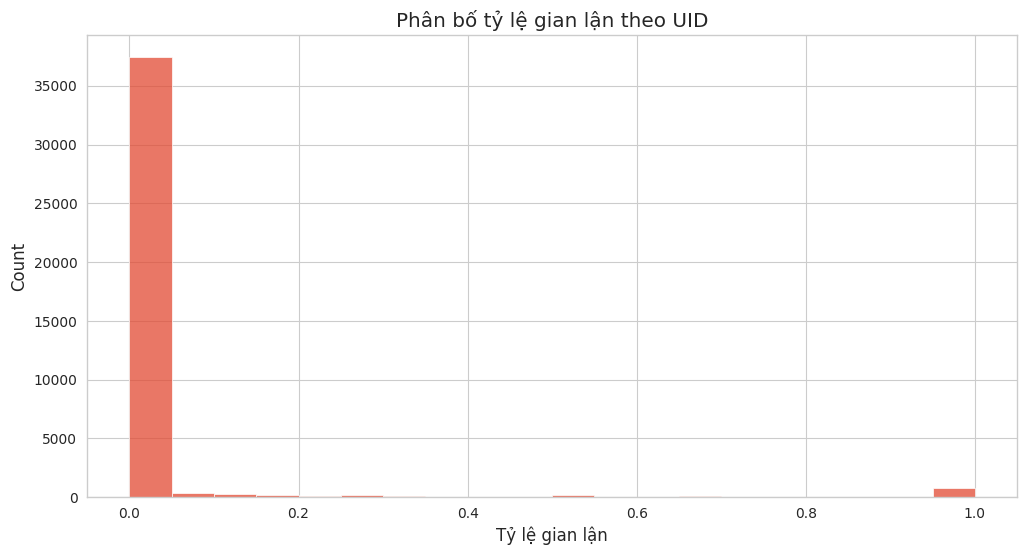

In [38]:
# Vẽ biểu đồ phân bố tỷ lệ gian lận theo UID
plt.figure(figsize=(12, 6))
sns.histplot(uid_stats['fraud_rate'], bins=20)
plt.title('Phân bố tỷ lệ gian lận theo UID')
plt.xlabel('Tỷ lệ gian lận')
plt.show()

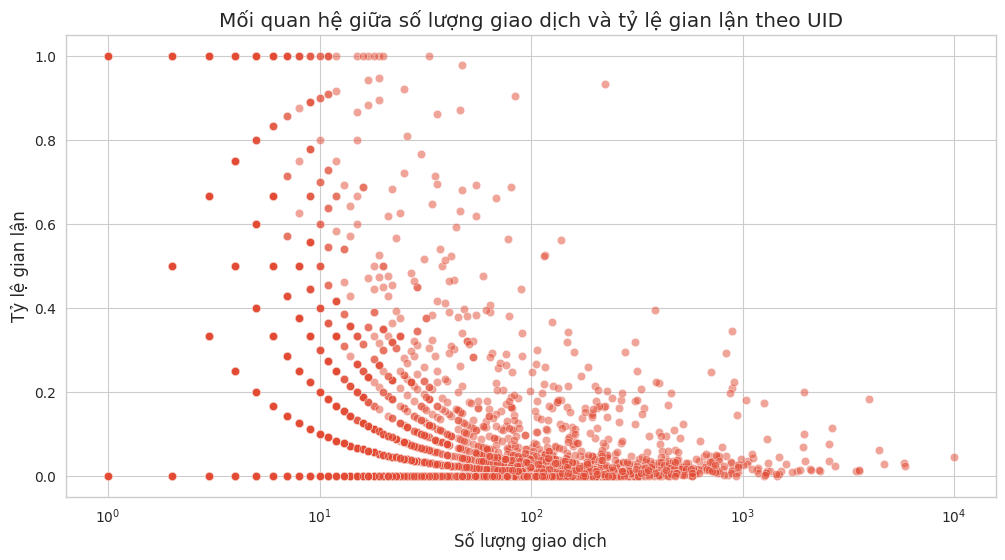

In [39]:
# Vẽ biểu đồ phân tán giữa số lượng giao dịch và tỷ lệ gian lận
plt.figure(figsize=(12, 6))
sns.scatterplot(x='transaction_count', y='fraud_rate', data=uid_stats, alpha=0.5)
plt.title('Mối quan hệ giữa số lượng giao dịch và tỷ lệ gian lận theo UID')
plt.xlabel('Số lượng giao dịch')
plt.ylabel('Tỷ lệ gian lận')
plt.xscale('log')
plt.show()

# 5. Tạo đặc trưng tổng hợp theo khách hàng

In [40]:
# Tạo đặc trưng tổng hợp theo uid1
def create_aggregated_features(df, group_var, agg_cols):
    """
    Tạo đặc trưng tổng hợp theo biến nhóm
    """
    for col in agg_cols:
        # Bỏ qua nếu cột không tồn tại
        if col not in df.columns:
            continue
            
        # Kiểm tra kiểu dữ liệu
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            continue
            
        # Tính các thống kê
        prefix = f'{col}_{group_var}'
        
        # Tính giá trị trung bình
        df[f'{prefix}_mean'] = df.groupby([group_var])[col].transform('mean')
        
        # Tính độ lệch chuẩn
        df[f'{prefix}_std'] = df.groupby([group_var])[col].transform('std')
        
        # Tính giá trị lớn nhất
        df[f'{prefix}_max'] = df.groupby([group_var])[col].transform('max')
        
        # Tính giá trị nhỏ nhất
        df[f'{prefix}_min'] = df.groupby([group_var])[col].transform('min')
        
        # Tính số lượng giá trị duy nhất
        df[f'{prefix}_nunique'] = df.groupby([group_var])[col].transform('nunique')
    
    # Tính số lượng giao dịch theo nhóm
    df[f'{group_var}_count'] = df.groupby([group_var])['TransactionID'].transform('count')
    
    return df

In [41]:
# Danh sách các cột số để tạo đặc trưng tổng hợp
numeric_cols = ['TransactionAmt', 'TransactionAmt_decimal', 'Day', 'Hour']

In [42]:
# Thêm các cột D (timedelta)
d_cols = [col for col in train.columns if col.startswith('D')]
numeric_cols.extend(d_cols)

In [43]:
# Thêm các cột C (counting)
c_cols = [col for col in train.columns if col.startswith('C')]
numeric_cols.extend(c_cols)

In [44]:
# Tạo đặc trưng tổng hợp cho tập train và test
for df in [train, test]:
    df = create_aggregated_features(df, 'uid1', numeric_cols)

In [45]:
# Kiểm tra các đặc trưng mới
new_features = [col for col in train.columns if 'uid1' in col and col != 'uid1']
print(f"Số lượng đặc trưng tổng hợp mới: {len(new_features)}")
print("Một số đặc trưng tổng hợp mới:")
print(new_features[:10])

Số lượng đặc trưng tổng hợp mới: 171
Một số đặc trưng tổng hợp mới:
['TransactionAmt_uid1_mean', 'TransactionAmt_uid1_std', 'TransactionAmt_uid1_max', 'TransactionAmt_uid1_min', 'TransactionAmt_uid1_nunique', 'TransactionAmt_decimal_uid1_mean', 'TransactionAmt_decimal_uid1_std', 'TransactionAmt_decimal_uid1_max', 'TransactionAmt_decimal_uid1_min', 'TransactionAmt_decimal_uid1_nunique']


# 6. Tiền xử lý dữ liệu

In [46]:
# Xử lý giá trị thiếu
def handle_missing_values(df):
    """
    Xử lý giá trị thiếu cho các cột số và phân loại
    """
    for col in df.columns:
        # Bỏ qua TransactionID và isFraud
        if col in ['TransactionID', 'isFraud', 'TransactionDate']:
            continue
            
        # Xử lý cột số
        if df[col].dtype != 'object':
            # Thay thế giá trị thiếu bằng -999
            df[col] = df[col].fillna(-999)
        else:
            # Thay thế giá trị thiếu bằng 'missing'
            df[col] = df[col].fillna('missing')
    
    return df

In [47]:
# Xử lý giá trị thiếu cho tập train và test
train = handle_missing_values(train)
test = handle_missing_values(test)

In [48]:
# Kiểm tra lại giá trị thiếu
print("Số lượng giá trị thiếu sau khi xử lý:")
print(f"Train: {train.isnull().sum().sum()}")
print(f"Test: {test.isnull().sum().sum()}")

Số lượng giá trị thiếu sau khi xử lý:
Train: 0
Test: 0


In [49]:
# Mã hóa đặc trưng phân loại
def label_encode(df_train, df_test, cols):
    """
    Mã hóa đặc trưng phân loại bằng LabelEncoder,
    xử lý trường hợp cột có thể chỉ tồn tại ở một trong hai DataFrame.
    Fit encoder trên tất cả giá trị có thể có ở cả train/test nếu cột tồn tại.
    """
    # Tạo bản sao để tránh cảnh báo SettingWithCopyWarning
    df_train = df_train.copy()
    df_test = df_test.copy()

    print("--- Starting Flexible Label Encoding ---")
    for col in cols:
        # Xác định xem cột có tồn tại không
        train_col_exists = col in df_train.columns
        test_col_exists = col in df_test.columns

        # Xác định xem có phải kiểu object ở nơi nó tồn tại không
        # Chỉ cần là object ở ít nhất 1 nơi để xem xét mã hóa
        is_object_somewhere = (train_col_exists and df_train[col].dtype == 'object') or \
                              (test_col_exists and df_test[col].dtype == 'object')

        # Nếu cột không tồn tại ở đâu cả, hoặc không phải là object ở bất kỳ đâu nó tồn tại -> bỏ qua
        if not (train_col_exists or test_col_exists) or not is_object_somewhere:
            # print(f"Skipping column '{col}': Does not exist or not object type where it exists.")
            continue

        print(f"Processing column: '{col}'")

        # --- Fitting ---
        le = LabelEncoder()
        values_to_fit = []

        # Lấy giá trị từ train nếu cột tồn tại và là object
        if train_col_exists and df_train[col].dtype == 'object':
            # Chuyển sang str để xử lý NaN và các kiểu khác, lấy giá trị .values
            values_to_fit.extend(list(df_train[col].astype(str).values))
            print(f"  Found object column '{col}' in train.")

        # Lấy giá trị từ test nếu cột tồn tại và là object
        if test_col_exists and df_test[col].dtype == 'object':
            # Chuyển sang str để xử lý NaN và các kiểu khác, lấy giá trị .values
            values_to_fit.extend(list(df_test[col].astype(str).values))
            print(f"  Found object column '{col}' in test.")
        elif test_col_exists:
             print(f"  Column '{col}' exists in test but is not object type ({df_test[col].dtype}).")
        else:
             print(f"  Column '{col}' does not exist in test.")


        # Chỉ fit nếu có giá trị hợp lệ (tránh lỗi với cột trống hoặc toàn NaN)
        # Lấy tập hợp các giá trị duy nhất để fit
        unique_values = pd.Series(values_to_fit).unique()
        if len(unique_values) > 0:
            print(f"  Fitting LabelEncoder for '{col}' on {len(unique_values)} unique values.")
            le.fit(unique_values) # Fit trên các giá trị duy nhất đã thu thập

            # --- Transforming ---
            # Áp dụng transform cho train nếu cột tồn tại và là object
            if train_col_exists and df_train[col].dtype == 'object':
                try:
                    df_train[col] = le.transform(df_train[col].astype(str))
                    print(f"  Transformed train column '{col}'.")
                except ValueError as e:
                    print(f"  ERROR transforming train column '{col}': {e}. Check for unseen values.")
                    # Xử lý lỗi nếu cần (ví dụ: gán giá trị đặc biệt cho giá trị không thấy)
                    # df_train[col] = df_train[col].astype(str).map(lambda x: le.transform([x])[0] if x in le.classes_ else -1) # Ví dụ

            # Áp dụng transform cho test nếu cột tồn tại và là object
            if test_col_exists and df_test[col].dtype == 'object':
                try:
                    df_test[col] = le.transform(df_test[col].astype(str))
                    print(f"  Transformed test column '{col}'.")
                except ValueError as e:
                    print(f"  ERROR transforming test column '{col}': {e}. Check for unseen values.")
                    # Xử lý lỗi nếu cần
                    # df_test[col] = df_test[col].astype(str).map(lambda x: le.transform([x])[0] if x in le.classes_ else -1) # Ví dụ
        else:
            print(f"  Skipping fitting/transforming for '{col}': No valid values found.")

    print("--- Finished Flexible Label Encoding ---")
    # Không nên có df_train.head() trong hàm, hãy gọi nó bên ngoài sau khi hàm chạy xong
    return df_train, df_test

In [50]:
# Danh sách các cột phân loại
categorical_cols = [col for col in train.columns if train[col].dtype == 'object']
categorical_cols

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_12',
 'id_15',
 'id_16',
 'id_23',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'uid1',
 'uid2',
 'uid3',
 'uid4']

In [51]:
# Thêm các cột M (match)
m_cols = [col for col in train.columns if col.startswith('M')]
categorical_cols.extend(m_cols)

In [52]:
# Thêm các cột id_12-id_38
id_cols = [col for col in train.columns if col.startswith('id_') and int(col.split('_')[1]) >= 12]
categorical_cols.extend(id_cols)

In [53]:
# Thêm các cột UID
uid_cols = [col for col in train.columns if col.startswith('uid')]
categorical_cols.extend(uid_cols)

In [54]:
# Loại bỏ các cột đã được xử lý
categorical_cols = list(set(categorical_cols))
categorical_cols

['card4',
 'M6',
 'id_23',
 'M9',
 'M4',
 'id_24',
 'id_31',
 'id_38',
 'DeviceInfo',
 'card6',
 'M7',
 'id_37',
 'uid2',
 'id_33',
 'id_30',
 'uid1',
 'id_13',
 'id_18',
 'id_27',
 'uid1_count',
 'DeviceType',
 'Month',
 'id_20',
 'id_35',
 'R_emaildomain',
 'id_19',
 'id_36',
 'M2',
 'id_16',
 'id_22',
 'id_26',
 'uid3',
 'id_14',
 'id_15',
 'M1',
 'ProductCD',
 'P_emaildomain',
 'M5',
 'id_17',
 'id_29',
 'M3',
 'id_34',
 'id_21',
 'uid4',
 'id_25',
 'id_28',
 'id_32',
 'M8',
 'id_12']

In [55]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,...,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDate,Day,Month,DayOfWeek,Hour,TransactionAmt_decimal,uid1,uid2,uid3,uid4,TransactionAmt_uid1_mean,TransactionAmt_uid1_std,TransactionAmt_uid1_max,TransactionAmt_uid1_min,TransactionAmt_uid1_nunique,TransactionAmt_decimal_uid1_mean,TransactionAmt_decimal_uid1_std,TransactionAmt_decimal_uid1_max,TransactionAmt_decimal_uid1_min,TransactionAmt_decimal_uid1_nunique,Day_uid1_mean,Day_uid1_std,Day_uid1_max,Day_uid1_min,Day_uid1_nunique,Hour_uid1_mean,Hour_uid1_std,Hour_uid1_max,Hour_uid1_min,Hour_uid1_nunique,D1_uid1_mean,D1_uid1_std,D1_uid1_max,D1_uid1_min,D1_uid1_nunique,D2_uid1_mean,D2_uid1_std,D2_uid1_max,D2_uid1_min,D2_uid1_nunique,D3_uid1_mean,D3_uid1_std,D3_uid1_max,D3_uid1_min,D3_uid1_nunique,D4_uid1_mean,D4_uid1_std,D4_uid1_max,D4_uid1_min,D4_uid1_nunique,D5_uid1_mean,D5_uid1_std,D5_uid1_max,D5_uid1_min,D5_uid1_nunique,D6_uid1_mean,D6_uid1_std,D6_uid1_max,D6_uid1_min,D6_uid1_nunique,D7_uid1_mean,D7_uid1_std,D7_uid1_max,D7_uid1_min,D7_uid1_nunique,D8_uid1_mean,D8_uid1_std,D8_uid1_max,D8_uid1_min,D8_uid1_nunique,D9_uid1_mean,D9_uid1_std,D9_uid1_max,D9_uid1_min,D9_uid1_nunique,D10_uid1_mean,D10_uid1_std,D10_uid1_max,D10_uid1_min,D10_uid1_nunique,D11_uid1_mean,D11_uid1_std,D11_uid1_max,D11_uid1_min,D11_uid1_nunique,D12_uid1_mean,D12_uid1_std,D12_uid1_max,D12_uid1_min,D12_uid1_nunique,D13_uid1_mean,D13_uid1_std,D13_uid1_max,D13_uid1_min,D13_uid1_nunique,D14_uid1_mean,D14_uid1_std,D14_uid1_max,D14_uid1_min,D14_uid1_nunique,D15_uid1_mean,D15_uid1_std,D15_uid1_max,D15_uid1_min,D15_uid1_nunique,DayOfWeek_uid1_mean,DayOfWeek_uid1_std,DayOfWeek_uid1_max,DayOfWeek_uid1_min,DayOfWeek_uid1_nunique,C1_uid1_mean,C1_uid1_std,C1_uid1_max,C1_uid1_min,C1_uid1_nunique,C2_uid1_mean,C2_uid1_std,C2_uid1_max,C2_uid1_min,C2_uid1_nunique,C3_uid1_mean,C3_uid1_std,C3_uid1_max,C3_uid1_min,C3_uid1_nunique,C4_uid1_mean,C4_uid1_std,C4_uid1_max,C4_uid1_min,C4_uid1_nunique,C5_uid1_mean,C5_uid1_std,C5_uid1_max,C5_uid1_min,C5_uid1_nunique,C6_uid1_mean,C6_uid1_std,C6_uid1_max,C6_uid1_min,C6_uid1_nunique,C7_uid1_mean,C7_uid1_std,C7_uid1_max,C7_uid1_min,C7_uid1_nunique,C8_uid1_mean,C8_uid1_std,C8_uid1_max,C8_uid1_min,C8_uid1_nunique,C9_uid1_mean,C9_uid1_std,C9_uid1_max,C9_uid1_min,C9_uid1_nunique,C10_uid1_mean,C10_uid1_std,C10_uid1_max,C10_uid1_min,C10_uid1_nunique,C11_uid1_mean,C11_uid1_std,C11_uid1_max,C11_uid1_min,C11_uid1_nunique,C12_uid1_mean,C12_uid1_std,C12_uid1_max,C12_uid1_min,C12_uid1_nunique,C13_uid1_mean,C13_uid1_std,C13_uid1_max,

In [56]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,...,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDate,Day,Month,DayOfWeek,Hour,TransactionAmt_decimal,uid1,uid2,uid3,uid4,TransactionAmt_uid1_mean,TransactionAmt_uid1_std,TransactionAmt_uid1_max,TransactionAmt_uid1_min,TransactionAmt_uid1_nunique,TransactionAmt_decimal_uid1_mean,TransactionAmt_decimal_uid1_std,TransactionAmt_decimal_uid1_max,TransactionAmt_decimal_uid1_min,TransactionAmt_decimal_uid1_nunique,Day_uid1_mean,Day_uid1_std,Day_uid1_max,Day_uid1_min,Day_uid1_nunique,Hour_uid1_mean,Hour_uid1_std,Hour_uid1_max,Hour_uid1_min,Hour_uid1_nunique,D1_uid1_mean,D1_uid1_std,D1_uid1_max,D1_uid1_min,D1_uid1_nunique,D2_uid1_mean,D2_uid1_std,D2_uid1_max,D2_uid1_min,D2_uid1_nunique,D3_uid1_mean,D3_uid1_std,D3_uid1_max,D3_uid1_min,D3_uid1_nunique,D4_uid1_mean,D4_uid1_std,D4_uid1_max,D4_uid1_min,D4_uid1_nunique,D5_uid1_mean,D5_uid1_std,D5_uid1_max,D5_uid1_min,D5_uid1_nunique,D6_uid1_mean,D6_uid1_std,D6_uid1_max,D6_uid1_min,D6_uid1_nunique,D7_uid1_mean,D7_uid1_std,D7_uid1_max,D7_uid1_min,D7_uid1_nunique,D8_uid1_mean,D8_uid1_std,D8_uid1_max,D8_uid1_min,D8_uid1_nunique,D9_uid1_mean,D9_uid1_std,D9_uid1_max,D9_uid1_min,D9_uid1_nunique,D10_uid1_mean,D10_uid1_std,D10_uid1_max,D10_uid1_min,D10_uid1_nunique,D11_uid1_mean,D11_uid1_std,D11_uid1_max,D11_uid1_min,D11_uid1_nunique,D12_uid1_mean,D12_uid1_std,D12_uid1_max,D12_uid1_min,D12_uid1_nunique,D13_uid1_mean,D13_uid1_std,D13_uid1_max,D13_uid1_min,D13_uid1_nunique,D14_uid1_mean,D14_uid1_std,D14_uid1_max,D14_uid1_min,D14_uid1_nunique,D15_uid1_mean,D15_uid1_std,D15_uid1_max,D15_uid1_min,D15_uid1_nunique,DayOfWeek_uid1_mean,DayOfWeek_uid1_std,DayOfWeek_uid1_max,DayOfWeek_uid1_min,DayOfWeek_uid1_nunique,C1_uid1_mean,C1_uid1_std,C1_uid1_max,C1_uid1_min,C1_uid1_nunique,C2_uid1_mean,C2_uid1_std,C2_uid1_max,C2_uid1_min,C2_uid1_nunique,C3_uid1_mean,C3_uid1_std,C3_uid1_max,C3_uid1_min,C3_uid1_nunique,C4_uid1_mean,C4_uid1_std,C4_uid1_max,C4_uid1_min,C4_uid1_nunique,C5_uid1_mean,C5_uid1_std,C5_uid1_max,C5_uid1_min,C5_uid1_nunique,C6_uid1_mean,C6_uid1_std,C6_uid1_max,C6_uid1_min,C6_uid1_nunique,C7_uid1_mean,C7_uid1_std,C7_uid1_max,C7_uid1_min,C7_uid1_nunique,C8_uid1_mean,C8_uid1_std,C8_uid1_max,C8_uid1_min,C8_uid1_nunique,C9_uid1_mean,C9_uid1_std,C9_uid1_max,C9_uid1_min,C9_uid1_nunique,C10_uid1_mean,C10_uid1_std,C10_uid1_max,C10_uid1_min,C10_uid1_nunique,C11_uid1_mean,C11_uid1_std,C11_uid1_max,C11_uid1_min,C11_uid1_nunique,C12_uid1_mean,C12_uid1_std,C12_uid1_max,C12_uid1_min,C12_uid1_nunique,C13_uid1_mean,C13_uid1_std,C13_uid1_max,C13

In [57]:
# Mã hóa đặc trưng phân loại
train, test = label_encode(train, test, categorical_cols)

--- Starting Flexible Label Encoding ---
Processing column: 'card4'
  Found object column 'card4' in train.
  Found object column 'card4' in test.
  Fitting LabelEncoder for 'card4' on 5 unique values.
  Transformed train column 'card4'.
  Transformed test column 'card4'.
Processing column: 'M6'
  Found object column 'M6' in train.
  Found object column 'M6' in test.
  Fitting LabelEncoder for 'M6' on 3 unique values.
  Transformed train column 'M6'.
  Transformed test column 'M6'.
Processing column: 'id_23'
  Found object column 'id_23' in train.
  Found object column 'id_23' in test.
  Fitting LabelEncoder for 'id_23' on 4 unique values.
  Transformed train column 'id_23'.
  Transformed test column 'id_23'.
Processing column: 'M9'
  Found object column 'M9' in train.
  Found object column 'M9' in test.
  Fitting LabelEncoder for 'M9' on 3 unique values.
  Transformed train column 'M9'.
  Transformed test column 'M9'.
Processing column: 'M4'
  Found object column 'M4' in train.
  Foun

In [58]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,...,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDate,Day,Month,DayOfWeek,Hour,TransactionAmt_decimal,uid1,uid2,uid3,uid4,TransactionAmt_uid1_mean,TransactionAmt_uid1_std,TransactionAmt_uid1_max,TransactionAmt_uid1_min,TransactionAmt_uid1_nunique,TransactionAmt_decimal_uid1_mean,TransactionAmt_decimal_uid1_std,TransactionAmt_decimal_uid1_max,TransactionAmt_decimal_uid1_min,TransactionAmt_decimal_uid1_nunique,Day_uid1_mean,Day_uid1_std,Day_uid1_max,Day_uid1_min,Day_uid1_nunique,Hour_uid1_mean,Hour_uid1_std,Hour_uid1_max,Hour_uid1_min,Hour_uid1_nunique,D1_uid1_mean,D1_uid1_std,D1_uid1_max,D1_uid1_min,D1_uid1_nunique,D2_uid1_mean,D2_uid1_std,D2_uid1_max,D2_uid1_min,D2_uid1_nunique,D3_uid1_mean,D3_uid1_std,D3_uid1_max,D3_uid1_min,D3_uid1_nunique,D4_uid1_mean,D4_uid1_std,D4_uid1_max,D4_uid1_min,D4_uid1_nunique,D5_uid1_mean,D5_uid1_std,D5_uid1_max,D5_uid1_min,D5_uid1_nunique,D6_uid1_mean,D6_uid1_std,D6_uid1_max,D6_uid1_min,D6_uid1_nunique,D7_uid1_mean,D7_uid1_std,D7_uid1_max,D7_uid1_min,D7_uid1_nunique,D8_uid1_mean,D8_uid1_std,D8_uid1_max,D8_uid1_min,D8_uid1_nunique,D9_uid1_mean,D9_uid1_std,D9_uid1_max,D9_uid1_min,D9_uid1_nunique,D10_uid1_mean,D10_uid1_std,D10_uid1_max,D10_uid1_min,D10_uid1_nunique,D11_uid1_mean,D11_uid1_std,D11_uid1_max,D11_uid1_min,D11_uid1_nunique,D12_uid1_mean,D12_uid1_std,D12_uid1_max,D12_uid1_min,D12_uid1_nunique,D13_uid1_mean,D13_uid1_std,D13_uid1_max,D13_uid1_min,D13_uid1_nunique,D14_uid1_mean,D14_uid1_std,D14_uid1_max,D14_uid1_min,D14_uid1_nunique,D15_uid1_mean,D15_uid1_std,D15_uid1_max,D15_uid1_min,D15_uid1_nunique,DayOfWeek_uid1_mean,DayOfWeek_uid1_std,DayOfWeek_uid1_max,DayOfWeek_uid1_min,DayOfWeek_uid1_nunique,C1_uid1_mean,C1_uid1_std,C1_uid1_max,C1_uid1_min,C1_uid1_nunique,C2_uid1_mean,C2_uid1_std,C2_uid1_max,C2_uid1_min,C2_uid1_nunique,C3_uid1_mean,C3_uid1_std,C3_uid1_max,C3_uid1_min,C3_uid1_nunique,C4_uid1_mean,C4_uid1_std,C4_uid1_max,C4_uid1_min,C4_uid1_nunique,C5_uid1_mean,C5_uid1_std,C5_uid1_max,C5_uid1_min,C5_uid1_nunique,C6_uid1_mean,C6_uid1_std,C6_uid1_max,C6_uid1_min,C6_uid1_nunique,C7_uid1_mean,C7_uid1_std,C7_uid1_max,C7_uid1_min,C7_uid1_nunique,C8_uid1_mean,C8_uid1_std,C8_uid1_max,C8_uid1_min,C8_uid1_nunique,C9_uid1_mean,C9_uid1_std,C9_uid1_max,C9_uid1_min,C9_uid1_nunique,C10_uid1_mean,C10_uid1_std,C10_uid1_max,C10_uid1_min,C10_uid1_nunique,C11_uid1_mean,C11_uid1_std,C11_uid1_max,C11_uid1_min,C11_uid1_nunique,C12_uid1_mean,C12_uid1_std,C12_uid1_max,C12_uid1_min,C12_uid1_nunique,C13_uid1_mean,C13_uid1_std,C13_uid1_max,

In [59]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,...,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDate,Day,Month,DayOfWeek,Hour,TransactionAmt_decimal,uid1,uid2,uid3,uid4,TransactionAmt_uid1_mean,TransactionAmt_uid1_std,TransactionAmt_uid1_max,TransactionAmt_uid1_min,TransactionAmt_uid1_nunique,TransactionAmt_decimal_uid1_mean,TransactionAmt_decimal_uid1_std,TransactionAmt_decimal_uid1_max,TransactionAmt_decimal_uid1_min,TransactionAmt_decimal_uid1_nunique,Day_uid1_mean,Day_uid1_std,Day_uid1_max,Day_uid1_min,Day_uid1_nunique,Hour_uid1_mean,Hour_uid1_std,Hour_uid1_max,Hour_uid1_min,Hour_uid1_nunique,D1_uid1_mean,D1_uid1_std,D1_uid1_max,D1_uid1_min,D1_uid1_nunique,D2_uid1_mean,D2_uid1_std,D2_uid1_max,D2_uid1_min,D2_uid1_nunique,D3_uid1_mean,D3_uid1_std,D3_uid1_max,D3_uid1_min,D3_uid1_nunique,D4_uid1_mean,D4_uid1_std,D4_uid1_max,D4_uid1_min,D4_uid1_nunique,D5_uid1_mean,D5_uid1_std,D5_uid1_max,D5_uid1_min,D5_uid1_nunique,D6_uid1_mean,D6_uid1_std,D6_uid1_max,D6_uid1_min,D6_uid1_nunique,D7_uid1_mean,D7_uid1_std,D7_uid1_max,D7_uid1_min,D7_uid1_nunique,D8_uid1_mean,D8_uid1_std,D8_uid1_max,D8_uid1_min,D8_uid1_nunique,D9_uid1_mean,D9_uid1_std,D9_uid1_max,D9_uid1_min,D9_uid1_nunique,D10_uid1_mean,D10_uid1_std,D10_uid1_max,D10_uid1_min,D10_uid1_nunique,D11_uid1_mean,D11_uid1_std,D11_uid1_max,D11_uid1_min,D11_uid1_nunique,D12_uid1_mean,D12_uid1_std,D12_uid1_max,D12_uid1_min,D12_uid1_nunique,D13_uid1_mean,D13_uid1_std,D13_uid1_max,D13_uid1_min,D13_uid1_nunique,D14_uid1_mean,D14_uid1_std,D14_uid1_max,D14_uid1_min,D14_uid1_nunique,D15_uid1_mean,D15_uid1_std,D15_uid1_max,D15_uid1_min,D15_uid1_nunique,DayOfWeek_uid1_mean,DayOfWeek_uid1_std,DayOfWeek_uid1_max,DayOfWeek_uid1_min,DayOfWeek_uid1_nunique,C1_uid1_mean,C1_uid1_std,C1_uid1_max,C1_uid1_min,C1_uid1_nunique,C2_uid1_mean,C2_uid1_std,C2_uid1_max,C2_uid1_min,C2_uid1_nunique,C3_uid1_mean,C3_uid1_std,C3_uid1_max,C3_uid1_min,C3_uid1_nunique,C4_uid1_mean,C4_uid1_std,C4_uid1_max,C4_uid1_min,C4_uid1_nunique,C5_uid1_mean,C5_uid1_std,C5_uid1_max,C5_uid1_min,C5_uid1_nunique,C6_uid1_mean,C6_uid1_std,C6_uid1_max,C6_uid1_min,C6_uid1_nunique,C7_uid1_mean,C7_uid1_std,C7_uid1_max,C7_uid1_min,C7_uid1_nunique,C8_uid1_mean,C8_uid1_std,C8_uid1_max,C8_uid1_min,C8_uid1_nunique,C9_uid1_mean,C9_uid1_std,C9_uid1_max,C9_uid1_min,C9_uid1_nunique,C10_uid1_mean,C10_uid1_std,C10_uid1_max,C10_uid1_min,C10_uid1_nunique,C11_uid1_mean,C11_uid1_std,C11_uid1_max,C11_uid1_min,C11_uid1_nunique,C12_uid1_mean,C12_uid1_std,C12_uid1_max,C12_uid1_min,C12_uid1_nunique,C13_uid1_mean,C13_uid1_std,C13_uid1_max,C13

In [60]:
print([col for col in train.columns if train[col].dtype == 'object'])
print([col for col in test.columns if test[col].dtype == 'object'])

[]
[]


In [61]:
# Kiểm tra kết quả
print(f"Số lượng cột phân loại đã mã hóa: {len(categorical_cols)}")
print("Một số cột phân loại đã mã hóa:")
print(categorical_cols[:10])

Số lượng cột phân loại đã mã hóa: 49
Một số cột phân loại đã mã hóa:
['card4', 'M6', 'id_23', 'M9', 'M4', 'id_24', 'id_31', 'id_38', 'DeviceInfo', 'card6']


# 7. Chuẩn bị dữ liệu cho mô hình

In [62]:
# Loại bỏ các cột không cần thiết
cols_to_drop = ['TransactionID', 'TransactionDate']

In [63]:
# Chuẩn bị dữ liệu cho mô hình
X = train.drop(cols_to_drop + ['isFraud'], axis=1)
y = train['isFraud']
X_test = test.drop(cols_to_drop, axis=1)

In [64]:
# Xóa train và test để giải phóng RAM
del train
gc.collect()

23217

In [65]:
# Chia tập train thành tập huấn luyện và tập xác thực
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
X_train.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,...,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Day,Month,DayOfWeek,Hour,TransactionAmt_decimal,uid1,uid2,uid3,uid4,TransactionAmt_uid1_mean,TransactionAmt_uid1_std,TransactionAmt_uid1_max,TransactionAmt_uid1_min,TransactionAmt_uid1_nunique,TransactionAmt_decimal_uid1_mean,TransactionAmt_decimal_uid1_std,TransactionAmt_decimal_uid1_max,TransactionAmt_decimal_uid1_min,TransactionAmt_decimal_uid1_nunique,Day_uid1_mean,Day_uid1_std,Day_uid1_max,Day_uid1_min,Day_uid1_nunique,Hour_uid1_mean,Hour_uid1_std,Hour_uid1_max,Hour_uid1_min,Hour_uid1_nunique,D1_uid1_mean,D1_uid1_std,D1_uid1_max,D1_uid1_min,D1_uid1_nunique,D2_uid1_mean,D2_uid1_std,D2_uid1_max,D2_uid1_min,D2_uid1_nunique,D3_uid1_mean,D3_uid1_std,D3_uid1_max,D3_uid1_min,D3_uid1_nunique,D4_uid1_mean,D4_uid1_std,D4_uid1_max,D4_uid1_min,D4_uid1_nunique,D5_uid1_mean,D5_uid1_std,D5_uid1_max,D5_uid1_min,D5_uid1_nunique,D6_uid1_mean,D6_uid1_std,D6_uid1_max,D6_uid1_min,D6_uid1_nunique,D7_uid1_mean,D7_uid1_std,D7_uid1_max,D7_uid1_min,D7_uid1_nunique,D8_uid1_mean,D8_uid1_std,D8_uid1_max,D8_uid1_min,D8_uid1_nunique,D9_uid1_mean,D9_uid1_std,D9_uid1_max,D9_uid1_min,D9_uid1_nunique,D10_uid1_mean,D10_uid1_std,D10_uid1_max,D10_uid1_min,D10_uid1_nunique,D11_uid1_mean,D11_uid1_std,D11_uid1_max,D11_uid1_min,D11_uid1_nunique,D12_uid1_mean,D12_uid1_std,D12_uid1_max,D12_uid1_min,D12_uid1_nunique,D13_uid1_mean,D13_uid1_std,D13_uid1_max,D13_uid1_min,D13_uid1_nunique,D14_uid1_mean,D14_uid1_std,D14_uid1_max,D14_uid1_min,D14_uid1_nunique,D15_uid1_mean,D15_uid1_std,D15_uid1_max,D15_uid1_min,D15_uid1_nunique,DayOfWeek_uid1_mean,DayOfWeek_uid1_std,DayOfWeek_uid1_max,DayOfWeek_uid1_min,DayOfWeek_uid1_nunique,C1_uid1_mean,C1_uid1_std,C1_uid1_max,C1_uid1_min,C1_uid1_nunique,C2_uid1_mean,C2_uid1_std,C2_uid1_max,C2_uid1_min,C2_uid1_nunique,C3_uid1_mean,C3_uid1_std,C3_uid1_max,C3_uid1_min,C3_uid1_nunique,C4_uid1_mean,C4_uid1_std,C4_uid1_max,C4_uid1_min,C4_uid1_nunique,C5_uid1_mean,C5_uid1_std,C5_uid1_max,C5_uid1_min,C5_uid1_nunique,C6_uid1_mean,C6_uid1_std,C6_uid1_max,C6_uid1_min,C6_uid1_nunique,C7_uid1_mean,C7_uid1_std,C7_uid1_max,C7_uid1_min,C7_uid1_nunique,C8_uid1_mean,C8_uid1_std,C8_uid1_max,C8_uid1_min,C8_uid1_nunique,C9_uid1_mean,C9_uid1_std,C9_uid1_max,C9_uid1_min,C9_uid1_nunique,C10_uid1_mean,C10_uid1_std,C10_uid1_max,C10_uid1_min,C10_uid1_nunique,C11_uid1_mean,C11_uid1_std,C11_uid1_max,C11_uid1_min,C11_uid1_nunique,C12_uid1_mean,C12_uid1_std,C12_uid1_max,C12_uid1_min,C12_uid1_nunique,C13_uid1_mean,C13_uid1_std,C13_uid1_max,C13_uid1_min,C13_uid1_n

In [67]:
y_train.head()

40809     0
285886    0
104256    0
507860    0
196382    0
Name: isFraud, dtype: int64

In [68]:
# Kiểm tra kích thước dữ liệu
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (472432, 612)
X_val shape: (118108, 612)
X_test shape: (506691, 612)


In [69]:
# Xóa X và y để giải phóng RAM
# del X, y
# gc.collect()

In [70]:
del X_train, X_val
gc.collect()

0

# 8. Huấn luyện mô hình LightGBM

In [70]:
# Thiết lập tham số cho LightGBM
lgb_params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'n_jobs': -1,
    'learning_rate': 0.01,
    'num_leaves': 256,
    'max_depth': 8,
    'tree_learner': 'serial',
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'min_child_weight': 1,
    'min_child_samples': 20,
    'scale_pos_weight': 1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'verbose': -1
}

In [71]:
# Tạo tập dữ liệu LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [72]:
# Huấn luyện mô hình
lgb_model = lgb.train(
    lgb_params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    valid_names=['train', 'val'],
    num_boost_round=10000,
    callbacks=[lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(period=100)]
    # dừng early_stopping_rounds=100 nếu là phiên bản < 4.0.0
    # tượng tự, verbose_eval=100 thay cho lgb.log_evaluation nếu...
)

Training until validation scores don't improve for 100 rounds
[100]	train's auc: 0.907096	val's auc: 0.897244
[200]	train's auc: 0.932509	val's auc: 0.919576
[300]	train's auc: 0.946358	val's auc: 0.930766
[400]	train's auc: 0.955832	val's auc: 0.939005
[500]	train's auc: 0.961039	val's auc: 0.943181
[600]	train's auc: 0.965652	val's auc: 0.947338
[700]	train's auc: 0.969654	val's auc: 0.950771
[800]	train's auc: 0.972882	val's auc: 0.953509
[900]	train's auc: 0.975266	val's auc: 0.955386
[1000]	train's auc: 0.977255	val's auc: 0.95716
[1100]	train's auc: 0.97904	val's auc: 0.958643
[1200]	train's auc: 0.980655	val's auc: 0.960006
[1300]	train's auc: 0.981855	val's auc: 0.960971
[1400]	train's auc: 0.983264	val's auc: 0.962147
[1500]	train's auc: 0.984308	val's auc: 0.962998
[1600]	train's auc: 0.985406	val's auc: 0.963893
[1700]	train's auc: 0.986446	val's auc: 0.964888
[1800]	train's auc: 0.98736	val's auc: 0.965623
[1900]	train's auc: 0.988108	val's auc: 0.966297
[2000]	train's auc:

In [73]:
# Lưu mô hình
# lgb_model.save_model('lightgbm_model')

In [74]:
# Dự đoán trên tập xác thực
lgb_val_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)

In [75]:
# Đánh giá mô hình
lgb_val_auc = roc_auc_score(y_val, lgb_val_pred)
print(f"LightGBM Validation AUC: {lgb_val_auc:.6f}")

LightGBM Validation AUC: 0.979230


In [76]:
# Hiển thị đặc trưng quan trọng
lgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgb_model.feature_importance(importance_type='gain')
})
lgb_importance = lgb_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

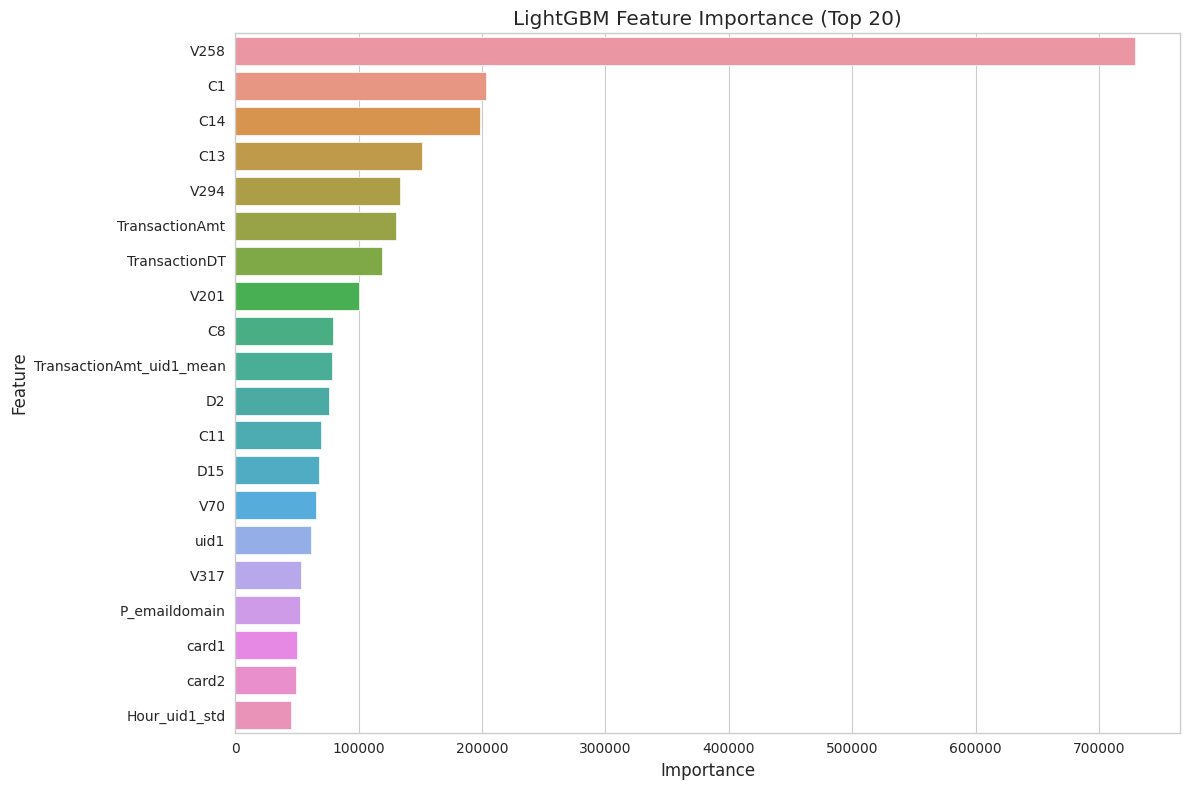

In [77]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=lgb_importance.head(20))
plt.title('LightGBM Feature Importance (Top 20)')
plt.tight_layout()
plt.show()

In [78]:
del lgb_val, lgb_val_pred, lgb_val_auc, lgb_importance
gc.collect()

6232

In [79]:
# Đánh giá trên tập dữ liệu test
lgb_test_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

In [80]:
# Lưu kết quả dự đoán
# np.save('/kaggle/working/lgb_test_pred.npy', lgb_test_pred)

In [81]:
del lgb_model, lgb_train
gc.collect()

4

# 9. Huấn luyện mô hình XGBoost

In [82]:
# Thiết lập tham số cho XGBoost
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.05,
    'max_depth': 8,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 0.1,
    'tree_method': 'hist',
    'nthread': -1,
    'scale_pos_weight': 1,
    'seed': 42
}

In [83]:
# Tạo tập dữ liệu XGBoost
xgb_train = xgb.DMatrix(X_train, y_train)
xgb_val = xgb.DMatrix(X_val, y_val)

In [84]:
# Thiết lập danh sách đánh giá
evallist = [(xgb_train, 'train'), (xgb_val, 'val')]

In [85]:
# Huấn luyện mô hình
xgb_model = xgb.train(
    xgb_params,
    xgb_train,
    num_boost_round=10000,
    evals=evallist,
    early_stopping_rounds=100,
    verbose_eval=100
)

[0]	train-auc:0.79898	val-auc:0.79251
[100]	train-auc:0.95968	val-auc:0.94126
[200]	train-auc:0.97955	val-auc:0.95865
[300]	train-auc:0.98742	val-auc:0.96540
[400]	train-auc:0.99200	val-auc:0.96957
[500]	train-auc:0.99477	val-auc:0.97252
[600]	train-auc:0.99671	val-auc:0.97468
[700]	train-auc:0.99793	val-auc:0.97604
[800]	train-auc:0.99866	val-auc:0.97687
[900]	train-auc:0.99919	val-auc:0.97754
[1000]	train-auc:0.99953	val-auc:0.97789
[1100]	train-auc:0.99974	val-auc:0.97828
[1200]	train-auc:0.99987	val-auc:0.97846
[1300]	train-auc:0.99994	val-auc:0.97856
[1400]	train-auc:0.99997	val-auc:0.97867
[1500]	train-auc:0.99999	val-auc:0.97878
[1600]	train-auc:0.99999	val-auc:0.97874
[1601]	train-auc:0.99999	val-auc:0.97873


In [86]:
# xgb_model.save_model('xgboost_model')

In [87]:
# Dự đoán trên tập xác thực với early stopping
xgb_val_pred = xgb_model.predict(xgb.DMatrix(X_val), iteration_range=(0, xgb_model.best_iteration + 1))

In [88]:
# Đánh giá mô hình
xgb_val_auc = roc_auc_score(y_val, xgb_val_pred)
print(f"XGBoost Validation AUC: {xgb_val_auc:.6f}")

XGBoost Validation AUC: 0.978790


In [89]:
# Hiển thị đặc trưng quan trọng
importance_dict = xgb_model.get_score(importance_type='gain')
all_features = X_train.columns
importance_values = [importance_dict.get(feat, 0) for feat in all_features]
xgb_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': importance_values
})
xgb_importance = xgb_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

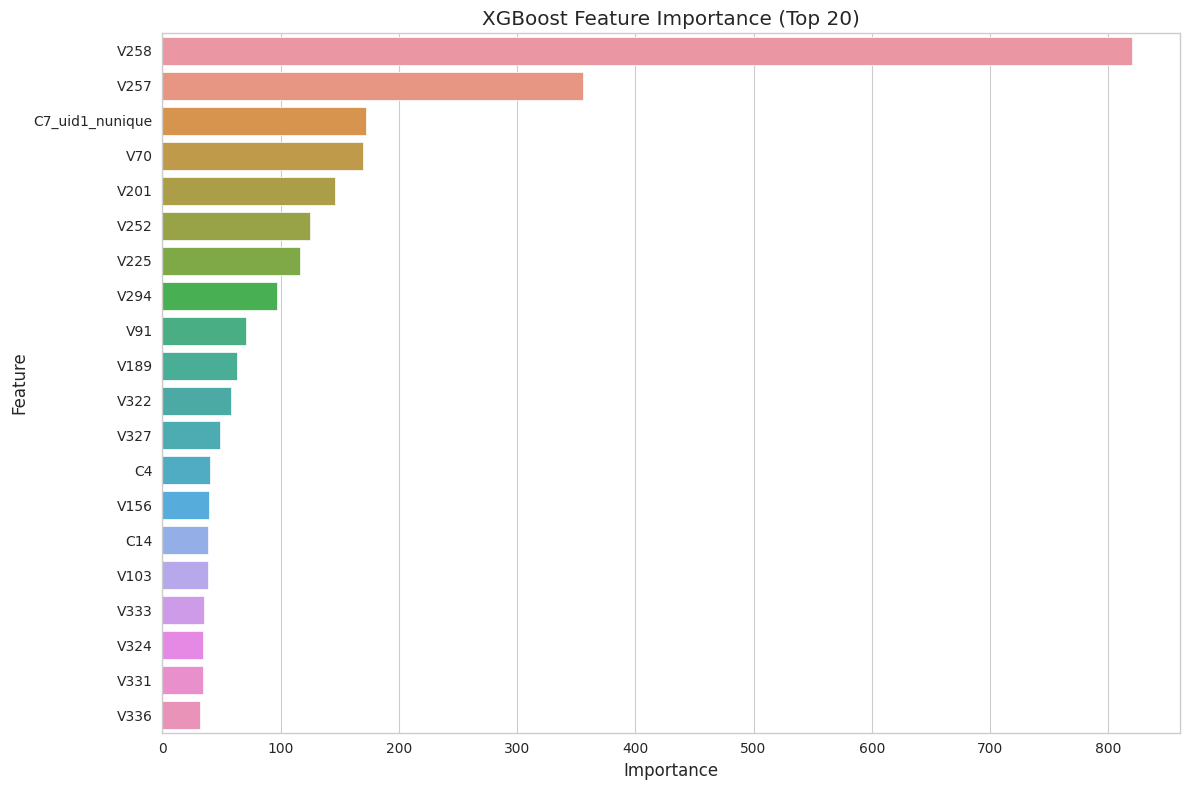

In [90]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(20))
plt.title('XGBoost Feature Importance (Top 20)')
plt.tight_layout()
plt.show()

In [91]:
del xgb_val, xgb_val_pred, xgb_val_auc, xgb_importance
gc.collect()

6326

In [92]:
# Đánh giá trên tập dữ liệu test
xgb_test_pred = xgb_model.predict(xgb.DMatrix(X_test), iteration_range=(0, xgb_model.best_iteration + 1))

In [93]:
# Lưu kết quả dự đoán
# np.save('/kaggle/working/xgb_test_pred.npy', xgb_test_pred)

In [94]:
del xgb_model, xgb_train
gc.collect()

7

# 10. Huấn luyện mô hình CatBoost

In [95]:
# Thiết lập tham số cho CatBoost
cat_params = {
    'iterations': 10000,
    'learning_rate': 0.05,
    'depth': 8,
    'l2_leaf_reg': 10,
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.8,
    'scale_pos_weight': 1,
    'eval_metric': 'AUC',
    'metric_period': 100,
    'od_type': 'Iter',
    'od_wait': 100,
    'random_seed': 42,
    'allow_writing_files': False,
    'task_type': 'CPU',
    'verbose': 100
}

In [96]:
# Huấn luyện mô hình
cat_model = CatBoostClassifier(**cat_params)
cat_model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True,
    early_stopping_rounds=100,
    verbose=False
)

In [97]:
# cat_model.save_model('catboost_model')

In [98]:
# Dự đoán trên tập xác thực
cat_val_pred = cat_model.predict_proba(X_val)[:, 1]

In [99]:
# Đánh giá mô hình
cat_val_auc = roc_auc_score(y_val, cat_val_pred)
print(f"CatBoost Validation AUC: {cat_val_auc:.6f}")

CatBoost Validation AUC: 0.975584


In [100]:
# Hiển thị đặc trưng quan trọng
cat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': cat_model.get_feature_importance()
})
cat_importance = cat_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

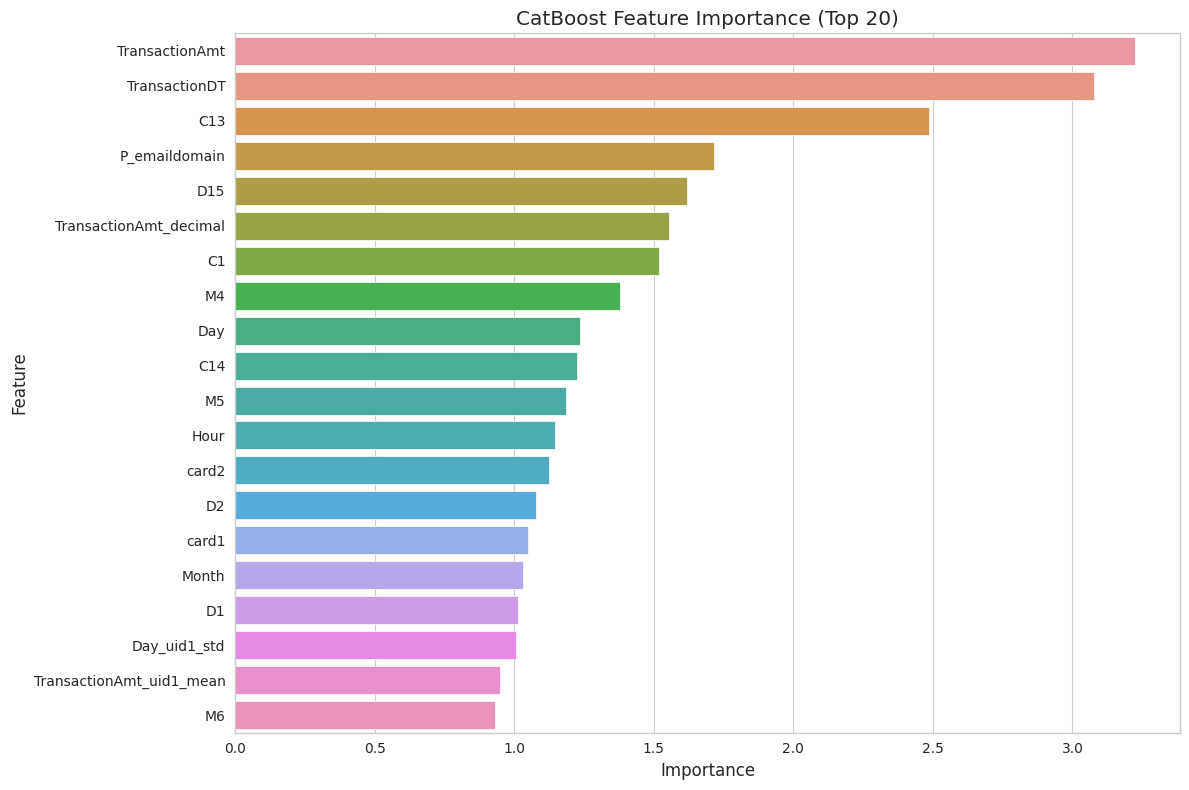

In [101]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=cat_importance.head(20))
plt.title('CatBoost Feature Importance (Top 20)')
plt.tight_layout()
plt.show()

In [103]:
del cat_val_pred, cat_val_auc, cat_importance
gc.collect()

6142

In [104]:
# Đánh giá trên tập dữ liệu test
cat_test_pred = cat_model.predict_proba(X_test)[:, 1]

In [105]:
# Lưu kết quả dự đoán
# np.save('/kaggle/working/cat_test_pred.npy', cat_test_pred)

In [106]:
del cat_model
gc.collect()

0

# 11. Kết hợp mô hình và hậu xử lý theo khách hàng

In [71]:
'''# Load lại model (do chạy một lần 3 mô hình khá tốn ram nên thực tế đã chạy 3 mô hình trên ở 3 lần khác nhau)
lgb_model = lgb.Booster(model_file='/kaggle/input/model-for-ieee-fraud-detection/lightgbm_model')
lgb_test_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
np.save('/kaggle/working/lgb_test_pred.npy', lgb_test_pred)
del lgb_model
gc.collect()

xgb_model = xgb.Booster(model_file='/kaggle/input/model-for-ieee-fraud-detection/xgboost_model.json')
xgb_test_pred = xgb_model.predict(xgb.DMatrix(X_test), iteration_range=(0, xgb_model.best_iteration + 1))
np.save('/kaggle/working/xgb_test_pred.npy', xgb_test_pred)
del xgb_model
gc.collect()

cat_model = CatBoostClassifier().load_model('/kaggle/input/model-for-ieee-fraud-detection/catboost_model')
cat_test_pred = cat_model.predict_proba(X_test)[:, 1]
np.save('/kaggle/working/cat_test_pred.npy', cat_test_pred)
del cat_model
gc.collect()'''

0

In [88]:
# Load lại kết quả prediction
lgb_test_pred = np.load('/kaggle/input/model-for-ieee-fraud-detection/lgb_test_pred.npy', allow_pickle=True)
xgb_test_pred = np.load('/kaggle/input/model-for-ieee-fraud-detection/xgb_test_pred.npy', allow_pickle=True)
cat_test_pred = np.load('/kaggle/input/model-for-ieee-fraud-detection/cat_test_pred.npy', allow_pickle=True)

In [137]:
# Kết hợp dự đoán với trọng số
# Dựa trên kết quả xác thực, chúng ta có thể điều chỉnh trọng số
weights = [0.1, 0.8, 0.1]  # LightGBM, XGBoost, CatBoost
test_pred = weights[0] * lgb_test_pred + weights[1] * xgb_test_pred + weights[2] * cat_test_pred

In [84]:
# Xóa các biến dự đoán riêng lẻ để giải phóng RAM
del lgb_test_pred, xgb_test_pred, cat_test_pred
gc.collect()

33

In [108]:
# Hậu xử lý theo khách hàng (UID)
# Tính dự đoán trung bình cho mỗi UID
test_uid_pred = test[['TransactionID', 'uid1']].copy()
test_uid_pred['prediction'] = test_pred

In [75]:
del X_test
gc.collect()

0

In [109]:
# Tính dự đoán trung bình cho mỗi UID
uid_mean_pred = test_uid_pred.groupby('uid1')['prediction'].transform('mean')

In [138]:
# Thay thế dự đoán gốc bằng dự đoán trung bình theo UID
test_pred_pp = test_pred #+ 1 * uid_mean_pred.values

In [77]:
# Xóa các biến không cần thiết
del test_pred, test_uid_pred, uid_mean_pred
gc.collect()

0

In [139]:
# Tạo file nộp bài
submission = pd.DataFrame({
    'TransactionID': test['TransactionID'],
    'isFraud': test_pred_pp
})

In [140]:
# Lưu file nộp bài
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [80]:
# Hiển thị thông tin về file nộp bài
print("Thông tin về file nộp bài:")
print(submission.describe())
print(f"Số lượng giao dịch: {len(submission)}")

Thông tin về file nộp bài:
       TransactionID       isFraud
count   5.066910e+05  5.066910e+05
mean    3.916894e+06  2.076289e-02
std     1.462692e+05  1.021109e-01
min     3.663549e+06  1.345162e-07
25%     3.790222e+06  5.029888e-04
50%     3.916894e+06  1.259369e-03
75%     4.043566e+06  4.834062e-03
max     4.170239e+06  9.999783e-01
Số lượng giao dịch: 506691


In [81]:
# Xóa submission để giải phóng RAM
del submission, test_pred_pp
gc.collect()

0

# 8*. Huấn luyện mô hình LightGBM với StratifiedKFold

In [71]:
# Thiết lập KFold
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

In [72]:
oof_preds_lgb = np.zeros(X.shape[0])
test_preds_lgb = np.zeros(X_test.shape[0])
feature_importance_df_lgb = pd.DataFrame()

In [73]:
# Thiết lập tham số LightGBM (giữ nguyên hoặc tinh chỉnh nếu cần)
lgb_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": "auc",
    "n_jobs": -1,
    "learning_rate": 0.01,
    "num_leaves": 256,
    "max_depth": 8, # Giảm độ sâu một chút để tránh overfitting
    "tree_learner": "serial",
    "colsample_bytree": 0.7, # Giảm một chút
    "subsample": 0.7, # Giảm một chút
    "min_child_weight": 1,
    "min_child_samples": 20,
    "scale_pos_weight": 1,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "verbose": -1,
    "seed": 42
}

In [74]:
print("Training LightGBM...")
# Vòng lặp qua các fold
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    print(f"Current Fold: {fold_+1}")
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label=y.iloc[val_idx])

    # Huấn luyện mô hình
    clf = lgb.train(
        lgb_params,
        trn_data,
        valid_sets=[trn_data, val_data],
        valid_names=["train", "val"],
        num_boost_round=10000,
        callbacks=[lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(period=100)]
    )

    # Dự đoán OOF
    oof_preds_lgb[val_idx] = clf.predict(X.iloc[val_idx], num_iteration=clf.best_iteration)

    # Dự đoán trên tập test
    test_preds_lgb += clf.predict(X_test, num_iteration=clf.best_iteration) / NFOLDS

    # Lưu feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = X.columns
    fold_importance_df["Importance"] = clf.feature_importance(importance_type="gain")
    fold_importance_df["Fold"] = fold_ + 1
    feature_importance_df_lgb = pd.concat([feature_importance_df_lgb, fold_importance_df], axis=0)

    del clf, trn_data, val_data, fold_importance_df
    gc.collect()

Training LightGBM...
Current Fold: 1
Training until validation scores don't improve for 100 rounds
[100]	train's auc: 0.907937	val's auc: 0.901763
[200]	train's auc: 0.93072	val's auc: 0.920454
[300]	train's auc: 0.944901	val's auc: 0.931529
[400]	train's auc: 0.954563	val's auc: 0.939126
[500]	train's auc: 0.960394	val's auc: 0.943492
[600]	train's auc: 0.965199	val's auc: 0.947139
[700]	train's auc: 0.969278	val's auc: 0.950457
[800]	train's auc: 0.972684	val's auc: 0.952926
[900]	train's auc: 0.975265	val's auc: 0.955039
[1000]	train's auc: 0.977463	val's auc: 0.956734
[1100]	train's auc: 0.979311	val's auc: 0.958204
[1200]	train's auc: 0.980941	val's auc: 0.959478
[1300]	train's auc: 0.982168	val's auc: 0.960441
[1400]	train's auc: 0.983429	val's auc: 0.961454
[1500]	train's auc: 0.984606	val's auc: 0.962421
[1600]	train's auc: 0.98564	val's auc: 0.963342
[1700]	train's auc: 0.986602	val's auc: 0.964133
[1800]	train's auc: 0.987764	val's auc: 0.965147
[1900]	train's auc: 0.988414	v

In [75]:
# Lưu kết quả dự đoán
# np.save('/kaggle/working/oof_preds_lgb_new.npy', oof_preds_lgb)
np.save('/kaggle/working/test_preds_lgb_new.npy', test_preds_lgb)

In [76]:
# Đánh giá OOF AUC
oof_auc_lgb = roc_auc_score(y, oof_preds_lgb)
print(f"LightGBM OOF AUC: {oof_auc_lgb:.6f}")

LightGBM OOF AUC: 0.977686


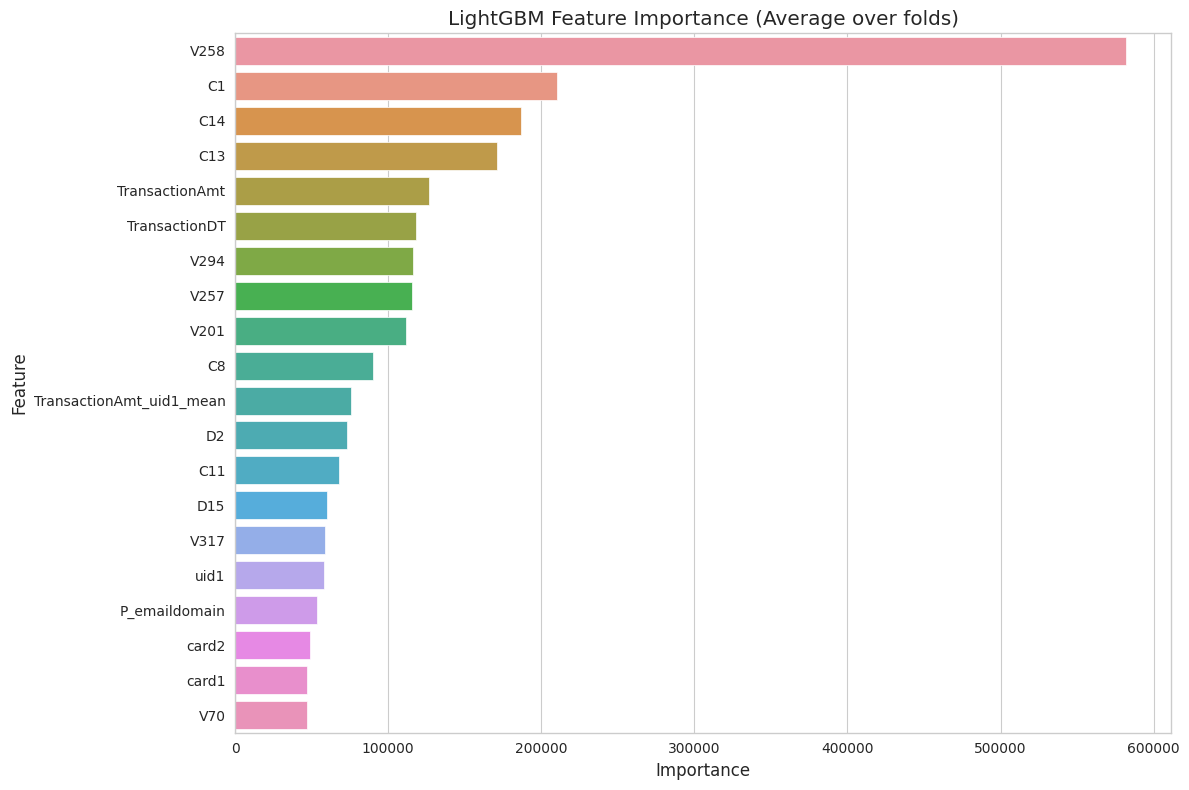

In [77]:
# Hiển thị đặc trưng quan trọng trung bình
mean_importance_lgb = feature_importance_df_lgb[["Feature", "Importance"]].groupby("Feature").mean().sort_values(by="Importance", ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_importance_lgb.Importance.head(20), y=mean_importance_lgb.head(20).index)
plt.title("LightGBM Feature Importance (Average over folds)")
plt.tight_layout()
plt.show()

In [78]:
del oof_preds_lgb, feature_importance_df_lgb, test_preds_lgb
gc.collect()

6118

# 9*. Huấn luyện mô hình XGBoost với StratifiedKFold

In [75]:
# Thiết lập KFold
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

In [71]:
X = X.astype('float32')
y = y.astype('int32')
X_test = X_test.astype('float32')

In [72]:
# Thiết lập KFold (sử dụng lại folds đã tạo)
oof_preds_xgb = np.zeros(X.shape[0])
test_preds_xgb = np.zeros(X_test.shape[0])
feature_importance_df_xgb = pd.DataFrame()

In [73]:
# Thiết lập tham số XGBoost (giữ nguyên hoặc tinh chỉnh)
xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.02, # Giảm learning rate
    "max_depth": 8,
    "min_child_weight": 1,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "alpha": 0.1,
    "lambda": 0.1,
    "tree_method": "gpu_hist",
    "nthread": -1,
    "scale_pos_weight": 1,
    "seed": 42
}

In [76]:
print("\nTraining XGBoost...")
# Vòng lặp qua các fold
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    print(f"Current Fold: {fold_+1}")
    
    # Tạo tập huấn luyện và validation
    X_train, y_train = X.iloc[trn_idx], y.iloc[trn_idx]
    X_valid, y_valid = X.iloc[val_idx], y.iloc[val_idx]
    
    # Tạo DMatrix
    train_data = xgb.DMatrix(X_train, label=y_train)
    valid_data = xgb.DMatrix(X_valid, label=y_valid)
    
    # Thiết lập watchlist
    watchlist = [(train_data, "train"), (valid_data, "val")]
    
    # Huấn luyện mô hình
    clf = xgb.train(
        xgb_params,
        train_data,
        num_boost_round=10000,
        evals=watchlist,
        early_stopping_rounds=100,
        verbose_eval=100
    )
    
    # Dự đoán OOF
    oof_preds_xgb[val_idx] = clf.predict(valid_data, iteration_range=(0, clf.best_iteration + 1))
    
    # Dự đoán trên tập test
    test_preds_xgb += clf.predict(xgb.DMatrix(X_test), iteration_range=(0, clf.best_iteration + 1)) / NFOLDS
    
    # Lưu feature importance
    fold_importance_df = pd.DataFrame.from_dict(clf.get_score(importance_type="gain"), orient="index", columns=["Importance"])
    fold_importance_df["Feature"] = fold_importance_df.index
    fold_importance_df["Fold"] = fold_ + 1
    feature_importance_df_xgb = pd.concat([feature_importance_df_xgb, fold_importance_df], axis=0)
    
    # Giải phóng bộ nhớ
    del clf, train_data, valid_data, X_train, y_train, X_valid, y_valid, fold_importance_df
    gc.collect()


Training XGBoost...
Current Fold: 1
[0]	train-auc:0.82907	val-auc:0.82605
[100]	train-auc:0.91255	val-auc:0.90496
[200]	train-auc:0.95062	val-auc:0.93556
[300]	train-auc:0.96677	val-auc:0.94811
[400]	train-auc:0.97505	val-auc:0.95503
[500]	train-auc:0.98056	val-auc:0.95939
[600]	train-auc:0.98405	val-auc:0.96197
[700]	train-auc:0.98702	val-auc:0.96421
[800]	train-auc:0.98931	val-auc:0.96604
[900]	train-auc:0.99109	val-auc:0.96747
[1000]	train-auc:0.99271	val-auc:0.96905
[1100]	train-auc:0.99402	val-auc:0.97005
[1200]	train-auc:0.99503	val-auc:0.97093
[1300]	train-auc:0.99593	val-auc:0.97176
[1400]	train-auc:0.99661	val-auc:0.97240
[1500]	train-auc:0.99722	val-auc:0.97305
[1600]	train-auc:0.99775	val-auc:0.97360
[1700]	train-auc:0.99815	val-auc:0.97400
[1800]	train-auc:0.99849	val-auc:0.97445
[1900]	train-auc:0.99880	val-auc:0.97475
[2000]	train-auc:0.99903	val-auc:0.97510
[2100]	train-auc:0.99922	val-auc:0.97530
[2200]	train-auc:0.99937	val-auc:0.97560
[2300]	train-auc:0.99948	val-auc

In [77]:
# Lưu kết quả dự đoán
# np.save('/kaggle/working/oof_preds_xgb_new.npy', oof_preds_xgb)
np.save('/kaggle/working/test_preds_xgb_new.npy', test_preds_xgb)

In [78]:
# Đánh giá OOF AUC
oof_auc_xgb = roc_auc_score(y, oof_preds_xgb)
print(f"XGBoost OOF AUC: {oof_auc_xgb:.6f}")

XGBoost OOF AUC: 0.977597


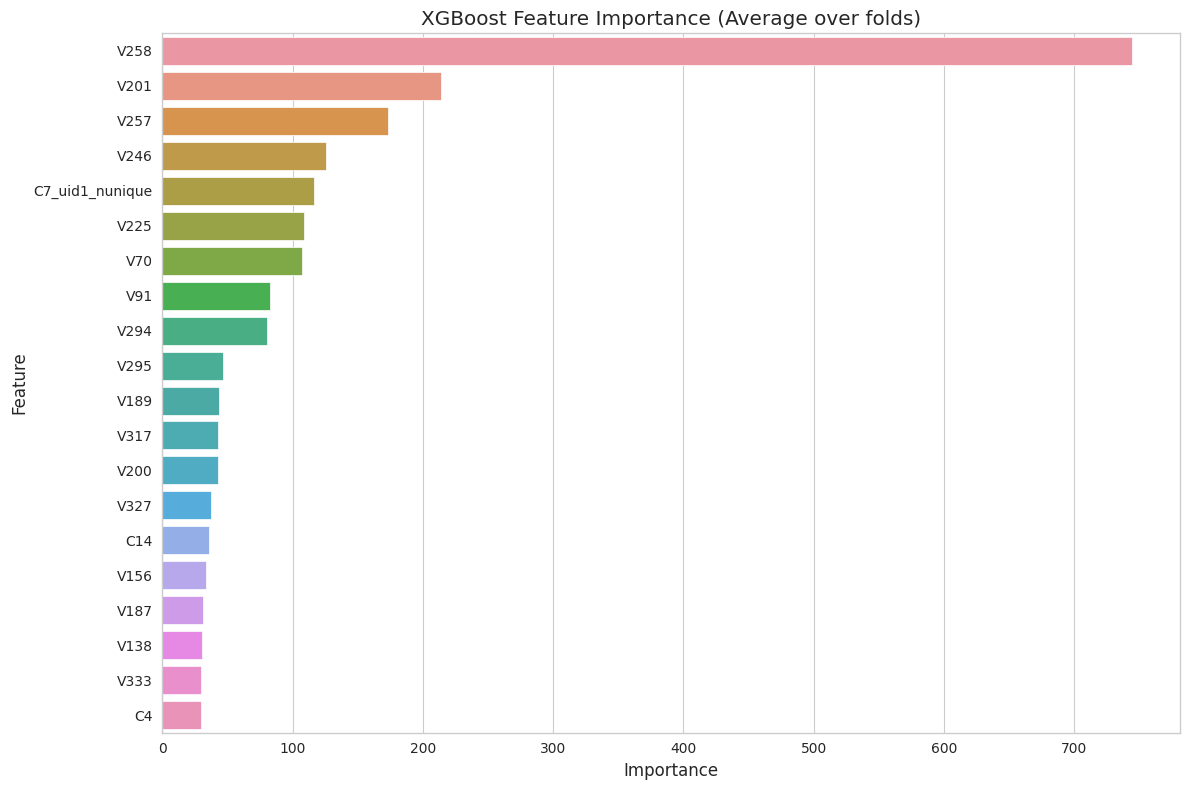

In [79]:
# Hiển thị đặc trưng quan trọng (Nếu bạn muốn, cần xử lý phần lưu importance ở trên)
mean_importance_xgb = feature_importance_df_xgb[["Feature", "Importance"]].groupby("Feature").mean().sort_values(by="Importance", ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_importance_xgb.Importance.head(20), y=mean_importance_xgb.head(20).index)
plt.title("XGBoost Feature Importance (Average over folds)")
plt.tight_layout()
plt.show()

In [80]:
del oof_preds_xgb, feature_importance_df_xgb, test_preds_xgb
gc.collect()

6212

# 10*. Huấn luyện mô hình CatBoost với StratifiedKFold

In [81]:
# Thiết lập KFold
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

In [82]:
# Khởi tạo mảng dự đoán
oof_preds_cat = np.zeros(X.shape[0], dtype=np.float32)
test_preds_cat = np.zeros(X_test.shape[0], dtype=np.float32)
feature_importance_df_cat = pd.DataFrame()

In [83]:
# Thiết lập tham số CatBoost
cat_params = {
    "iterations": 10000,
    "learning_rate": 0.02,
    "depth": 8,
    "l2_leaf_reg": 10,
    "bootstrap_type": "Bernoulli",
    "subsample": 0.7,
    "scale_pos_weight": 1,
    "eval_metric": "AUC",
    "metric_period": 100,
    "od_type": "Iter",
    "od_wait": 200,
    "random_seed": 42,
    "allow_writing_files": False,
    "task_type": "GPU",
    "verbose": 100
}

In [ ]:
# Nếu muốn chạy tốt hơn trên catboost, hãy xem xét thêm cat_features ở phần fit
# nhưng chú ý rằng các features được chỉ định này chỉ có thể thuộc kiểu int hoặc str

In [85]:
print("\nTraining CatBoost...")
# Vòng lặp qua các fold
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    print(f"Current Fold: {fold_+1}")
    X_trn, y_trn = X.iloc[trn_idx], y.iloc[trn_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Huấn luyện mô hình
    clf = CatBoostClassifier(**cat_params)
    clf.fit(
        X_trn, y_trn,
        eval_set=(X_val, y_val),
        use_best_model=True,
        verbose=False
    )

    # Dự đoán OOF
    oof_preds_cat[val_idx] = clf.predict_proba(X_val)[:, 1]
    
    # Dự đoán trên tập test
    test_preds_cat += clf.predict_proba(X_test)[:, 1] / NFOLDS

    # Lưu feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = X.columns
    fold_importance_df["Importance"] = clf.get_feature_importance()
    fold_importance_df["Fold"] = fold_ + 1
    feature_importance_df_cat = pd.concat([feature_importance_df_cat, fold_importance_df], axis=0)

    # Giải phóng bộ nhớ
    del clf, X_trn, y_trn, X_val, y_val, fold_importance_df
    gc.collect()


Training CatBoost...
Current Fold: 1
Current Fold: 2
Current Fold: 3
Current Fold: 4
Current Fold: 5


In [86]:
# Lưu kết quả dự đoán
# np.save('/kaggle/working/oof_preds_cat_new.npy', oof_preds_cat)
np.save('/kaggle/working/test_preds_cat_new.npy', test_preds_cat)

In [88]:
# Đánh giá OOF AUC
oof_auc_cat = roc_auc_score(y, oof_preds_cat)
print(f"CatBoost OOF AUC: {oof_auc_cat:.6f}")

CatBoost OOF AUC: 0.968033


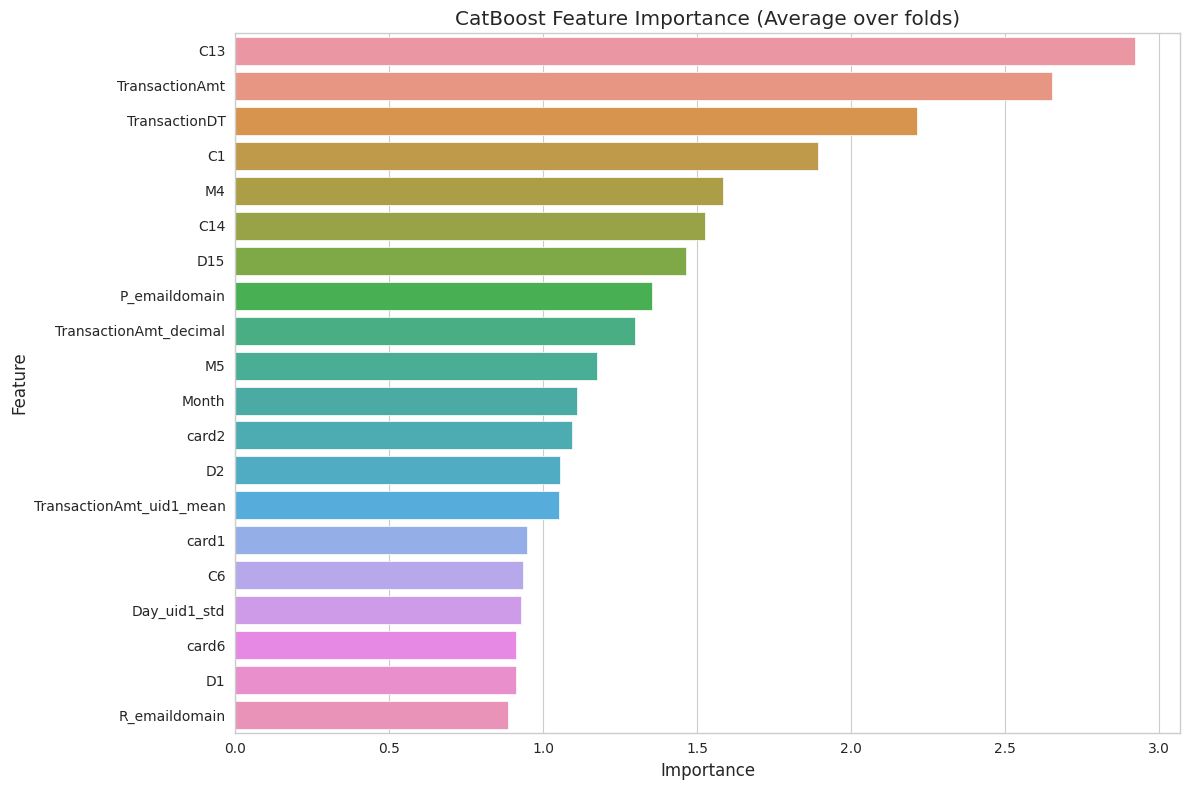

In [89]:
# Hiển thị đặc trưng quan trọng trung bình
mean_importance_cat = feature_importance_df_cat[["Feature", "Importance"]].groupby("Feature").mean().sort_values(by="Importance", ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_importance_cat.Importance.head(20), y=mean_importance_cat.head(20).index)
plt.title("CatBoost Feature Importance (Average over folds)")
plt.tight_layout()
plt.show()

In [90]:
del oof_preds_cat, feature_importance_df_cat, test_preds_cat
gc.collect()

6119

# 11*. Kết hợp mô hình và Tạo file nộp bài (Không có hậu xử lý UID)

In [98]:
'''# In OOF AUC của từng mô hình
print(f"LightGBM OOF AUC: {oof_auc_lgb:.6f}")
print(f"XGBoost OOF AUC: {oof_auc_xgb:.6f}")
print(f"CatBoost OOF AUC: {oof_auc_cat:.6f}")

# Kết hợp dự đoán OOF để tìm trọng số (ví dụ đơn giản)
# Bạn có thể dùng các phương pháp tối ưu hóa phức tạp hơn (như scipy.optimize)
# Hoặc dựa vào kinh nghiệm/thử nghiệm để chọn trọng số
oof_combined = 0.4 * oof_preds_lgb + 0.4 * oof_preds_xgb + 0.2 * oof_preds_cat
oof_auc_combined = roc_auc_score(y, oof_combined)
print(f"Combined OOF AUC (0.4 LGB, 0.4 XGB, 0.2 CAT): {oof_auc_combined:.6f}")'''

'# In OOF AUC của từng mô hình\nprint(f"LightGBM OOF AUC: {oof_auc_lgb:.6f}")\nprint(f"XGBoost OOF AUC: {oof_auc_xgb:.6f}")\nprint(f"CatBoost OOF AUC: {oof_auc_cat:.6f}")\n\n# Kết hợp dự đoán OOF để tìm trọng số (ví dụ đơn giản)\n# Bạn có thể dùng các phương pháp tối ưu hóa phức tạp hơn (như scipy.optimize)\n# Hoặc dựa vào kinh nghiệm/thử nghiệm để chọn trọng số\noof_combined = 0.4 * oof_preds_lgb + 0.4 * oof_preds_xgb + 0.2 * oof_preds_cat\noof_auc_combined = roc_auc_score(y, oof_combined)\nprint(f"Combined OOF AUC (0.4 LGB, 0.4 XGB, 0.2 CAT): {oof_auc_combined:.6f}")'

In [99]:
# Xóa các biến lớn từ các bước trước (nếu còn)
try:
    del X, X_test, y
    gc.collect()
except NameError:
    pass

In [100]:
# Load lại các mảng dự đoán đã lưu trữ
test_preds_lgb = np.load('/kaggle/input/model-for-ieee-fraud-detection/test_preds_lgb_new.npy').astype(np.float32)
test_preds_xgb = np.load('/kaggle/input/model-for-ieee-fraud-detection/test_preds_xgb_new.npy').astype(np.float32)
test_preds_cat = np.load('/kaggle/input/model-for-ieee-fraud-detection/test_preds_cat_new.npy').astype(np.float32)

In [101]:
# Kết hợp dự đoán trên tập test
weights = [0.1, 0.6, 0.3]  # LGB, XGB, CAT
test_pred_final = weights[0] * test_preds_lgb + weights[1] * test_preds_xgb + weights[2] * test_preds_cat

In [102]:
# Load TransactionID từ file test_transaction.csv, chỉ lấy cột cần thiết
transaction_ids = pd.read_csv("/kaggle/input/ieee-fraud-detection/test_transaction.csv", usecols=["TransactionID"])

In [103]:
# Tạo file nộp bài
submission = pd.DataFrame({
    "TransactionID": transaction_ids["TransactionID"].astype(np.int32),
    "isFraud": test_pred_final
})

In [104]:
# Lưu file nộp bài
submission.to_csv("submission_kfold.csv", index=False)

In [105]:
# Hiển thị thông tin về file nộp bài
print("\nThông tin về file nộp bài:")
print(submission.describe())
print(f"Số lượng giao dịch: {len(submission)}")


Thông tin về file nộp bài:
       TransactionID        isFraud
count   5.066910e+05  506691.000000
mean    3.916894e+06       0.022383
std     1.462692e+05       0.116581
min     3.663549e+06       0.000001
25%     3.790222e+06       0.000442
50%     3.916894e+06       0.001363
75%     4.043566e+06       0.004663
max     4.170239e+06       0.999892
Số lượng giao dịch: 506691


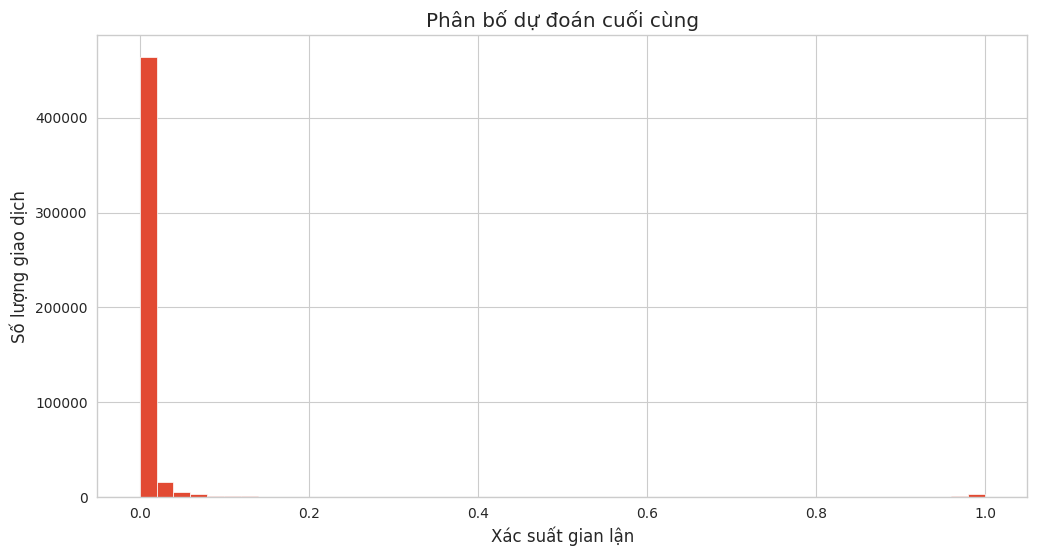

In [106]:
# Vẽ biểu đồ phân bố dự đoán
plt.figure(figsize=(12, 6))
plt.hist(submission["isFraud"], bins=50)
plt.title("Phân bố dự đoán cuối cùng")
plt.xlabel("Xác suất gian lận")
plt.ylabel("Số lượng giao dịch")
plt.show()

In [107]:
# Giải phóng bộ nhớ
del test_preds_lgb, test_preds_xgb, test_preds_cat, test_pred_final, transaction_ids, submission
gc.collect()

5281

# 12. Các kĩ thuật nâng cao